# Reto 2
---


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from scipy import stats
import scipy
import statsmodels as sm
from folium import plugins
import statsmodels.formula as smf
from sklearn import linear_model


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Problema

Pronosticar la demanda de los servicios TIC en Colombia. Para los servicios móviles, encontrar patrones temporales que permitan anticipar el comportamiento en la demanda futura. O para los servicios fijos, además de encontrar los posibles patrones temporales, encontrar los patrones espaciales y/o sociodemográficos que permitan pronosticar el comportamiento en la demanda futura. La solución más robusta permitiría a la CRC y a las empresas prestadoras de los respectivos servicios obtener un panorama sobre la demanda de los distintos servicios tanto de tipo móviles como fijos en los próximos meses y años.

#Objetivos
---
## Generales


* Pronosticar la demanda de los servicios TIC en Colombia.


## Especificos




*   Para los servicios fijos, encontrar patrones temporales que permitan anticipar el comportamiento en la demanda futura.

* Para los servicios fijos, encontrar los patrones espaciales y/o sociodemográficos que permitan pronosticar el comportamiento en la demanda futura.

*   Para los servicios móviles, encontrar patrones temporales que permitan anticipar el comportamiento en la demanda futura.






#Carga de Datos

##Servicios Fijos
---

###Datos
### Suscriptores e ingresos de Internet fijo

*   Accesos de Internet Fijo hasta 2017-1T [LINK](https://postdata.gov.co/dataset/suscriptores-e-ingresos-de-internet-fijo/resource/7c738136-b1ba-4f2c-9f99-e67b282d6425#{})
*   Accesos de Internet Fijo desde 2017-2T
[LINK](https://postdata.gov.co/dataset/suscriptores-e-ingresos-de-internet-fijo/resource/540ea080-bf16-4d63-911f-3b4814e8e4f1#{})
*   Ingresos de Internet Fijo
[LINK](https://postdata.gov.co/dataset/suscriptores-e-ingresos-de-internet-fijo/resource/d917a68d-9cb9-4257-82f1-74115a4cf629#{})


### Telefonía Local


*   Líneas de Telefonía Local [LINK](https://postdata.gov.co/dataset/telefon%C3%ADa-local/resource/967fbbd1-1c10-42b8-a6af-88b2376d43e7)
*   Tráfico de Telefonía Local
[LINK](https://postdata.gov.co/dataset/telefon%C3%ADa-local/resource/bb2b4afe-f098-4c5d-819a-cba76337c3a9)
*   Ingresos de Telefonía Local
[LINK](https://postdata.gov.co/dataset/telefon%C3%ADa-local/resource/f923f3bc-0628-44cc-beed-ca98b8bc3679)

### Suscriptores e Ingresos de Televisión por Suscripción


*   Suscriptores de TV por Suscripción [LINK](https://postdata.gov.co/dataset/suscriptores-e-ingresos-de-televisi%C3%B3n-por-suscripci%C3%B3n/resource/0c4b69a7-734d-432c-9d9b)
*   Ingresos de TV por Suscripción
[LINK](https://postdata.gov.co/dataset/suscriptores-e-ingresos-de-televisi%C3%B3n-por-suscripci%C3%B3n/resource/1033b0f2-8107-4e04-ae33)

___


###Suscriptores e ingresos de Internet fijo

In [ ]:
#Carga de archivos por medio de pandas
acceso_internetF1 = pd.read_csv('https://postdata.gov.co/sites/default/files/datasets/data/ACCESOS_INTERNET_FIJO_1_0.csv',sep=';')
tabla_acceso_internetF1 = pd.read_csv('https://postdata.gov.co/tablefield/export/node/218/field_dictionary/und/0',sep=';')
acceso_internetF2 = pd.read_csv('https://postdata.gov.co/sites/default/files/datasets/data/ACCESOS_INTERNET_FIJO_2_8.csv',sep=';')
tabla_acceso_internetF2 = pd.read_csv('https://postdata.gov.co/tablefield/export/node/287/field_dictionary/und/0',sep=';')
ingreso_internetF = pd.read_csv('https://postdata.gov.co/sites/default/files/datasets/data/INGRESOS_INTERNET_FIJO_7.csv',sep=';')
tabla_ingreso_internetF = pd.read_csv('https://postdata.gov.co/tablefield/export/node/220/field_dictionary/und/0',sep=';') 

In [ ]:
acceso_internetF1

,ANNO,TRIMESTRE,ID_EMPRESA,EMPRESA,ID_DEPARTAMENTO,DEPARTAMENTO,ID_MUNICIPIO,MUNICIPIO,ID_SEGMENTO,SEGMENTO,ID_TECNOLOGIA,TECNOLOGIA,ACCESOS
0,2010,1,830104796,GILAT NETWORKS COLOMBIA S.A. ESP,13,BOLIVAR,13620,SAN CRISTOBAL,14,COMPARTEL - TELECENTRO,6,SATELITAL,1
1,2010,1,830104796,GILAT NETWORKS COLOMBIA S.A. ESP,13,BOLIVAR,13647,SAN ESTANISLAO,14,COMPARTEL - TELECENTRO,6,SATELITAL,1
2,2010,1,830104796,GILAT NETWORKS COLOMBIA S.A. ESP,13,BOLIVAR,13650,SAN FERNANDO,14,COMPARTEL - TELECENTRO,6,SATELITAL,1
3,2010,1,830104796,GILAT NETWORKS COLOMBIA S.A. ESP,13,BOLIVAR,13654,SAN JACINTO,14,COMPARTEL - TELECENTRO,6,SATELITAL,1
4,2010,1,830104796,GILAT NETWORKS COLOMBIA S.A. ESP,13,BOLIVAR,13655,SAN JACINTO DEL CAUCA,14,COMPARTEL - TELECENTRO,6,SATELITAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789209,2017,1,900209693,CALDAS DATA COMPANY LTDA,17,CALDAS,17444,MARQUETALIA,7,CORPORATIVO,1,WIFI,1
789210,2017,1,900209693,CALDAS DATA COMPANY LTDA,17,CALDAS,17444,MARQUETALIA,8,CAFÉ INTERNET,1,WIFI,3
789211,2017,1,900209693,CALDAS DATA COMPANY LTDA,17,CALDAS,17444,MARQUETALIA,8,CAFÉ INTERNET,1,WIFI,2
789212,2017,1,900209693,CALDAS DATA COMPANY LTDA,17,CALDAS,17444,MARQUETALIA,8,CAFÉ INTERNET,1,WIFI,3


In [ ]:
tabla_acceso_internetF1

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,Numérico,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,Numérico,Corresponde al trimestre del año para el cual ...
2,ID_EMPRESA,Numérico,Corresponde al NIT del Proveedor de Redes y Se...
3,EMPRESA,Texto,Corresponde a la razón social del Proveedor de...
4,ID_DEPARTAMENTO,Numérico,Corresponde a la codificación DIVIPOLA para el...
5,DEPARTAMENTO,Texto,Nombre del departamento.
6,ID_MUNICIPIO,Numérico,Corresponde a la codificación DIVIPOLA para el...
7,MUNICIPIO,Texto,Nombre del municipio.
8,ID_SEGMENTO,Numérico,"""Corresponde al uso que se da al acceso, y tie..."
9,SEGMENTO,Texto\r\n,Corresponde al uso que se da al acceso.\r\n


In [ ]:
acceso_internetF2

,ANNO,TRIMESTRE,ID_EMPRESA,EMPRESA,ID_MUNICIPIO,MUNICIPIO,ID_DEPARTAMENTO,DEPARTAMENTO,ID_SEGMENTO,SEGMENTO,VELOCIDAD_EFECTIVA_DOWNSTREAM,VELOCIDAD_EFECTIVA_UPSTREAM,ID_TECNOLOGIA,TECNOLOGIA,ACCESOS
0,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,104,Residencial - Estrato 4,1,"0,5",114,Otras tecnologías inalámbricas,7
1,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,101,Residencial - Estrato 1,2,1,114,Otras tecnologías inalámbricas,1
2,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,107,Corporativo,"0,8","0,5",114,Otras tecnologías inalámbricas,1
3,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,107,Corporativo,"2,8",2,114,Otras tecnologías inalámbricas,13
4,2017,2,900217277,SYSTEL COMUNICACIONES CARTAGO S.A.S.,76147,CARTAGO,76,VALLE DEL CAUCA,104,Residencial - Estrato 4,"1,5","0,7",114,Otras tecnologías inalámbricas,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505576,2022,1,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15407,VILLA DE LEYVA,15,BOYACÁ,107,Corporativo,40,20,104,WiFi,2
1505577,2022,1,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15776,SUTAMARCHÁN,15,BOYACÁ,102,Residencial - Estrato 2,15,"7,5",104,WiFi,2
1505578,2022,1,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15407,VILLA DE LEYVA,15,BOYACÁ,102,Residencial - Estrato 2,5,"2,5",104,WiFi,10
1505579,2022,1,901397346,AJ GLOBAL PROYECTOS NET S.A.S.,15407,VILLA DE LEYVA,15,BOYACÁ,107,Corporativo,30,15,104,WiFi,2


In [ ]:
tabla_acceso_internetF2

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
3,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
4,ID_DEPARTAMENTO,ENTERO,Corresponde a la codificación DIVIPOLA para el...
5,DEPARTAMENTO,TEXTO,Nombre del departamento.
6,ID_MUNICIPIO,ENTERO,Corresponde a la codificación DIVIPOLA para el...
7,MUNICIPIO,TEXTO,Nombre del municipio.
8,ID_SEGMENTO,ENTERO,"Corresponde al uso que se da al acceso, y tien..."
9,SEGMENTO,TEXTO,Corresponde al uso que se da al acceso.


In [ ]:
ingreso_internetF

,ANNO,TRIMESTRE,ID_EMPRESA,EMPRESA,ID_SERVICIO,SERVICIO,ID_CONCEPTO,CONCEPTO,INGRESOS
0,2012,1,900022836,@NY PHONE S A ESP,101,Acceso fijo a Internet,NaN,NaN,46053095
1,2012,1,830016046,AVANTEL S.A.S,101,Acceso fijo a Internet,NaN,NaN,198129006
2,2012,1,830119051,AXESAT S.A.,101,Acceso fijo a Internet,NaN,NaN,2534730983
3,2012,1,900258177,BRASIL TELECOM DE COLOMBIA EMPRESA UNIPERSONAL,101,Acceso fijo a Internet,NaN,NaN,208241534
4,2012,1,900047715,CABLE & TV YOPAL SAS,101,Acceso fijo a Internet,NaN,NaN,57420000
...,...,...,...,...,...,...,...,...,...
11212,2022,1,2800000008,GROUP TELECOMUNICACIONES P&C SAS,101,Acceso fijo a Internet,0.0,NaN,242697160
11213,2022,1,2800000009,SUSETELCO S.A.S,101,Acceso fijo a Internet,0.0,NaN,155468564
11214,2022,1,2800000010,REDES INTEGRALES DE TELECOMUNICACIONES AyG SAS,101,Acceso fijo a Internet,0.0,NaN,400219675
11215,2022,1,2800000011,TV SUR LTDA,101,Acceso fijo a Internet,0.0,NaN,42857336


In [ ]:
tabla_ingreso_internetF

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
3,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
4,ID_SERVICIO,ENTERO,Corresponde al tipo de sevicio prestado por el...
5,SERVICIO,TEXTO,Descripción completa del campo ID_SERVICIO
6,ID_CONCEPTO,ENTERO,Corresponde a los rubros del ingreso que debe ...
7,CONCEPTO,TEXTO,Descripción completa del campo ID_CONCEPTO
8,INGRESOS,FLOTANTE,Corresponde al valor de los ingresos en pesos ...


### Telefonía Local

In [ ]:
#Carga de archivos por medio de pandas
lineas_telefonial = pd.read_csv('https://postdata.gov.co/sites/default/files/datasets/data/TF_LINEAS_0.csv',sep=';')
tabla_ingreso_telefonial = pd.read_csv('https://postdata.gov.co/tablefield/export/node/166/field_dictionary/und/0',sep=';')
ingreso_telefonial = pd.read_csv('https://postdata.gov.co/sites/default/files/datasets/data/TF_INGRESOS.csv',sep=';')
tabla_ingreso_telefonial2 = pd.read_csv('https://postdata.gov.co/tablefield/export/node/167/field_dictionary/und/0',sep=';')
trafico_telefonial = pd.read_csv('https://postdata.gov.co/sites/default/files/datasets/data/TELEFONIA_LOCAL_TRAFICO_0.csv',sep=';')
tabla_trafico_telefonial = pd.read_csv('https://postdata.gov.co/tablefield/export/node/177/field_dictionary/und/0',sep=';') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
lineas_telefonial

,ANNO,TRIMESTRE,ID_EMPRESA,EMPRESA,ID_DEPARTAMENTO,DEPARTAMENTO,ID_MUNICIPIO,MUNICIPIO,ID_UBICACION,UBICACION,ID_SEGMENTO,SEGMENTO,LINEAS
0,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76001,CALI,2,Urbano,1072,Comercial,938
1,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76001,CALI,2,Urbano,1073,Oficial,603
2,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76109,BUENAVENTURA,2,Urbano,101,Residencial - Estrato 1,283
3,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76109,BUENAVENTURA,2,Urbano,102,Residencial - Estrato 2,636
4,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76109,BUENAVENTURA,2,Urbano,103,Residencial - Estrato 3,743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265101,2022,1,901333616,TPE COMUNICACIONES COLOMBIA SAS,50.0,META,50001,VILLAVICENCIO,0,NaN,101,Residencial - Estrato 1,152
265102,2022,1,901333616,TPE COMUNICACIONES COLOMBIA SAS,50.0,META,50001,VILLAVICENCIO,0,NaN,102,Residencial - Estrato 2,356
265103,2022,1,901333616,TPE COMUNICACIONES COLOMBIA SAS,50.0,META,50001,VILLAVICENCIO,0,NaN,103,Residencial - Estrato 3,1052
265104,2022,1,901333616,TPE COMUNICACIONES COLOMBIA SAS,50.0,META,50001,VILLAVICENCIO,0,NaN,104,Residencial - Estrato 4,77


In [ ]:
tabla_ingreso_telefonial

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,Entero,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,Entero,Corresponde al trimestre para el cual se repor...
2,ID_EMPRESA,Entero,Corresponde al NIT del Proveedor de Redes y Se...
3,EMPRESA,Texto,Corresponde a la razón social del Proveedor de...
4,ID_DEPARTAMENTO,Entero,Corresponde a la codificación DIVIPOLA del DAN...
5,DEPARTAMENTO,Texto,Corresponde al nombre del departamento del paí...
6,ID_MUNICIPIO,Entero,Corresponde a la codificación DIVIPOLA del DAN...
7,MUNICIPIO,Texto,Corresponde al nombre del municipio del país. ...
8,ID_UBICACION,Entero,Corresponde a la codificación de la ubicación ...
9,UBICACION,Texto,Corresponde a la ubicación donde se encuentran...


In [ ]:
ingreso_telefonial

,ANNO,TRIMESTRE,ID_EMPRESA,EMPRESA,INGRESOS
0,2012,1,800135729,ERT SA ESP,1244080836
1,2012,1,800204278,METROPOLITANA DE TELECOMUNICACIONES S.A. E.S.P...,14052264110
2,2012,1,800208518,EMPRESA DE TELEFONOS DE JAMUNDI S.A. E.S.P. - ...,"165585465,39"
3,2012,1,800224288,UNITEL S.A ESP,"1489714939,7"
4,2012,1,805030753,IPSOFACTUM S.A.S.,2234340
...,...,...,...,...,...
838,2022,1,899999115,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,88173830909
839,2022,1,900092385,UNE EPM TELECOMUNICACIONES S.A.,74886071496
840,2022,1,900292948,UNIMOS EMPRESA MINICIPAL DE TELECOMUNICACIONES...,186932390
841,2022,1,901169857,NODO PACIFICO S.A.S E.S.P,0


In [ ]:
tabla_ingreso_telefonial2

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,Entero,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,Entero,Corresponde al trimestre para el cual se repor...
2,ID_EMPRESA,Texto,Corresponde al NIT del Proveedor de Redes y Se...
3,EMPRESA,Entero,Corresponde a la razón social del Proveedor de...
4,INGRESOS,Entero,Los ingresos para la información de 2012-1T a ...


In [ ]:
trafico_telefonial

,ANNO,TRIMESTRE,ID_EMPRESA,EMPRESA,ID_DEPARTAMENTO,DEPARTAMENTO,ID_MUNICIPIO,MUNICIPIO,ID_UBICACION,UBICACION,ID_SEGMENTO,SEGMENTO,TRAFICO
0,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76001,CALI,2.0,Urbano,101,Residencial - Estrato 1,1184
1,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76001,CALI,2.0,Urbano,102,Residencial - Estrato 2,18623
2,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76001,CALI,2.0,Urbano,103,Residencial - Estrato 3,2188
3,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76001,CALI,2.0,Urbano,104,Residencial - Estrato 4,537
4,2012,1,800135729,ERT SA ESP,76.0,VALLE DEL CAUCA,76001,CALI,2.0,Urbano,105,Residencial - Estrato 5,1166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264471,2021,4,899999115,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,25.0,CUNDINAMARCA,25817,TOCANCIPÁ,NaN,NaN,102,Residencial - Estrato 2,5975
264472,2021,4,899999115,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,25.0,CUNDINAMARCA,25817,TOCANCIPÁ,NaN,NaN,103,Residencial - Estrato 3,2593
264473,2021,4,899999115,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,25.0,CUNDINAMARCA,25817,TOCANCIPÁ,NaN,NaN,104,Residencial - Estrato 4,5
264474,2021,4,899999115,EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP,25.0,CUNDINAMARCA,25754,SOACHA,NaN,NaN,102,Residencial - Estrato 2,2115650


In [ ]:
tabla_trafico_telefonial

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,Numérico,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,Numérico,Corresponde al trimestre para el cual se repor...
2,ID_EMPRESA,Numérico,Corresponde al NIT del Proveedor de Redes y Se...
3,EMPRESA,Texto,Corresponde a la razón social del Proveedor de...
4,ID_DEPARTAMENTO,Numérico,Corresponde a la codificación DIVIPOLA del DAN...
5,DEPARTAMENTO,Texto,Corresponde al nombre del departamento del país.
6,ID_MUNICIPIO,Numérico,Corresponde a la codificación DIVIPOLA del DAN...
7,MUNICIPIO,Texto,Corresponde al nombre del municipio del país.
8,ID_UBICACION,Numérico,Corresponde a la codificación de la ubicación ...
9,UBICACION,Texto,Corresponde a la ubicación donde se encuentran...


### Suscriptores e Ingresos de Televisión por Suscripción


In [ ]:
#Carga de archivos por medio de pandas
suscriptores_tv = pd.read_csv('https://postdata.gov.co/sites/default/files/datasets/data/SUSCRIPTORES_TV_8.csv',sep=';')
tabla_suscriptores_tv = pd.read_csv('https://postdata.gov.co/tablefield/export/node/282/field_dictionary/und/0',sep=';')
ingresos_tv = pd.read_csv('https://postdata.gov.co/sites/default/files/datasets/data/INGRESOS_TV_12.csv',sep=';')
tabla_ingresos_tv = pd.read_csv('https://postdata.gov.co/tablefield/export/node/283/field_dictionary/und/0',sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
suscriptores_tv

,ANNO,TRIMESTRE,MES,TIPO_OPERADOR,ID_OPERADOR,OPERADOR,ID_DEPARTAMENTO,DEPARTAMENTO,ID_MUNICIPIO,MUNICIPIO,ESAL,SUSCRIPTORES,SEGMENTO,DESC_SEGMENTO,TIPO_TECNOLOGIA,DES_TIPO_TECNOLOGIA_TELEVISION
0,2010,1,1,MUNICIPALES,800075305,INGENIERIA EN POTENCIA ELECTRICA Y COMUNICACIO...,54,NORTE DE SANTANDER,54498,OCAÑA,0,2021,0,NaN,0,NaN
1,2010,1,1,MUNICIPALES,800096566,CENTRO ELECTRONICO SERVI-AUTO RADIO SAR Y COMP...,99999,NaN,99999,NaN,0,0,0,NaN,0,NaN
2,2010,1,1,MUNICIPALES,800111243,ALPEVISION S.A.,41,HUILA,41001,NEIVA,0,0,0,NaN,0,NaN
3,2010,1,1,MUNICIPALES,800132211,H V TELEVISION S.A.S.,25,CUNDINAMARCA,25754,SOACHA,0,18928,0,NaN,0,NaN
4,2010,1,1,MUNICIPALES,800179562,LEGON TELECOMUNICACIONES S.A.S.,5,ANTIOQUIA,5154,CAUCASIA,0,369,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546736,2022,1,3,NaN,901453896,FIBERLINKNETWORKS S.A.S,5,ANTIOQUIA,5736,SEGOVIA,0,903,1,Residencial - Estrato 1,2,HFC Analógica
546737,2022,1,3,NaN,901453896,FIBERLINKNETWORKS S.A.S,86,PUTUMAYO,86568,PUERTO ASÍS,0,135,1,Residencial - Estrato 1,2,HFC Analógica
546738,2022,1,3,NaN,901460140,DIGI COMUNICACIONES TV. NET S.A.S.,13,BOLÍVAR,13650,SAN FERNANDO,0,49,1,Residencial - Estrato 1,2,HFC Analógica
546739,2022,1,3,NaN,901491625,VITEL COMUNICACIONES NET SAS,68,SANTANDER,68276,FLORIDABLANCA,0,142,3,Residencial - Estrato 3,3,HFC Digital


In [ ]:
tabla_suscriptores_tv

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre para el cual se repor...
2,MES,ENTERO,Corresponde al mes del año para el cual se rep...
3,TIPO_OPERADOR,TEXTO,Corresponde al tipo de tecnología que utiliza ...
4,ID_OPERADOR,ENTERO,Corresponde al NIT del Operador que presta el ...
5,OPERADOR,TEXTO,Razón social del Operador que presta el servic...
6,ID_DEPARTAMENTO,ENTERO,Corresponde a la codificación DIVIPOLA para el...
7,DEPARTAMENTO,TEXTO,Nombre del departamento.
8,ID_MUNICIPIO,ENTERO,Corresponde a la codificación DIVIPOLA para el...
9,MUNICIPIO,TEXTO,Nombre del municipio.


In [ ]:
ingresos_tv

,ANNO,TRIMESTRE,ID_EMPRESA,DESC_EMPRESA,ID_SERVICIO,SERVICIO,ID_CONCEPTO,CONCEPTO,INGRESOS,INGR_BRUTOS_PAUTA_PUBLICITARIA
0,2014,1,800075305,INGENIERIA EN POTENCIA ELECTRICA Y COMUNICACIO...,108,Televisión por suscripción,0,NaN,"46929764,0","0,0"
1,2014,1,800132211,HV TELEVISION SAS,108,Televisión por suscripción,0,NaN,"3867871196,0","0,0"
2,2014,1,800179562,LEGON COMUNICACIONES SAS,108,Televisión por suscripción,0,NaN,"19603015,0","0,0"
3,2014,1,800256449,ALFASURT TV CABLE LTDA,108,Televisión por suscripción,0,NaN,"178837437,0","0,0"
4,2014,1,802003000,TEVECOM LTDA,108,Televisión por suscripción,0,NaN,"20273276,0","0,0"
...,...,...,...,...,...,...,...,...,...,...
2177,2022,1,901440102,GLOBAL WEB1 S.A.S,100,Televisión por suscripción,0,NaN,"34989000,0","0,0"
2178,2022,1,901453896,FIBERLINKNETWORKS S.A.S,100,Televisión por suscripción,0,NaN,"100576947,0","0,0"
2179,2022,1,901460140,DIGI COMUNICACIONES TV. NET S.A.S.,100,Televisión por suscripción,0,NaN,"1815210,0","0,0"
2180,2022,1,901491625,VITEL COMUNICACIONES NET SAS,100,Televisión por suscripción,0,NaN,"14066361,0","0,0"


In [ ]:
tabla_ingresos_tv

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
3,DESC_EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
4,ID_SERVICIO,ENTERO,Corresponde al tipo de sevicio prestado por el...
5,SERVICIO,TEXTO,Descripción completa del campo ID_SERVICIO
6,ID_CONCEPTO,ENTERO,Corresponde a los rubros del ingreso que debe ...
7,CONCEPTO,TEXTO,Descripción completa del campo ID_CONCEPTO
8,INGRESOS,FLOTANTE,Corresponde a los Ingresos operacionales expre...
9,INGR_BRUTOS_PAUTA_PUBLICITARIA,FLOTANTE,Corresponde al valor total de los ingresos bru...


##Servicios Móviles
---

###Datos
### Abonados, ingresos y tráfico de Internet móvil por demanda
*  Abonados de internet móvil por demanda [LINK](https://postdata.gov.co/dataset/abonados-ingresos-y-tr%C3%A1fico-de-internet-m%C3%B3vil-por-demanda/resource/3df620f6-deec-42a0-a6af)
*  Ingresos de Internet Móvil por Demanda
[LINK](https://postdata.gov.co/dataset/abonados-ingresos-y-tr%C3%A1fico-de-internet-m%C3%B3vil-por-demanda/resource/60a55889-ba71-45ff-b68f)
*   Tráfico de Internet Móvil por Demanda
[LINK](https://postdata.gov.co/dataset/abonados-ingresos-y-tr%C3%A1fico-de-internet-m%C3%B3vil-por-demanda/resource/c0be7034-29f8-4400-be54)


### Abonados, ingresos y tráfico de telefonía móvil


*   Abonados de voz móvil [LINK](https://postdata.gov.co/dataset/abonados-ingresos-y-tr%C3%A1fico-de-telefon%C3%ADa-m%C3%B3vil/resource/3a9c0304-3795-4c55-a78e-079362373b4d)
*   Ingresos de voz móvil
[LINK](https://postdata.gov.co/dataset/abonados-ingresos-y-tr%C3%A1fico-de-telefon%C3%ADa-m%C3%B3vil/resource/43f0d3a9-cd5c-4f22-a996-74eae6cba9a3)
*   Tráfico de voz móvil
[LINK](https://postdata.gov.co/dataset/abonados-ingresos-y-tr%C3%A1fico-de-telefon%C3%ADa-m%C3%B3vil/resource/1384a4d4-42d7-4930-b43c-bf9768c47ccb)

### Suscriptores, ingresos y tráfico de Internet móvil por cargo fijo


*  Suscriptores de Internet Móvil de Cargo Fijo [LINK](https://postdata.gov.co/dataset/suscriptores-ingresos-y-tr%C3%A1fico-de-internet-m%C3%B3vil-por-cargo-fijo/resource/47d07e20-b257-4aaf)
*   Ingresos de Internet Móvil de Cargo Fijo
[LINK](https://postdata.gov.co/dataset/suscriptores-ingresos-y-tr%C3%A1fico-de-internet-m%C3%B3vil-por-cargo-fijo/resource/8366e39c-6a14-483a)
*   Tráfico de Internet Móvil de Cargo Fijo
[LINK](https://postdata.gov.co/dataset/suscriptores-ingresos-y-tr%C3%A1fico-de-internet-m%C3%B3vil-por-cargo-fijo/resource/d40c5e75-db56-4ec1)

### Tráfico e Ingresos de Mensajería Móvil SMS


*  Tráfico Mensajería móvil [LINK](https://postdata.gov.co/dataset/tr%C3%A1fico-e-ingresos-de-mensajer%C3%ADa-m%C3%B3vil-sms/resource/8a0fcc94-a241-47ce-8245-569e54a22fd4)
*   Ingresos Mensajería Móvil
[LINK](https://postdata.gov.co/dataset/tr%C3%A1fico-e-ingresos-de-mensajer%C3%ADa-m%C3%B3vil-sms/resource/aff5be3b-9a52-4777-956b-14094a265df2)


___





### Abonados, ingresos y tráfico de Internet móvil por demanda



In [ ]:
#Carga de archivos por medio de pandas
Abonados_internetM = pd.read_csv('https://postdata.gov.co/node/228/download',sep=';')
tabla_abonados_internetM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/228/field_dictionary/und/0',sep=';')
Ingresos_internetM = pd.read_csv('https://postdata.gov.co/node/230/download',sep=';')
tabla_ingresos_internetM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/230/field_dictionary/und/0',sep=';')
Traficos_internetM = pd.read_csv('https://postdata.gov.co/node/232/download',sep=';')
tabla_trafico_internetM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/232/field_dictionary/und/0',sep=';')

In [ ]:
Abonados_internetM

,ANNO,TRIMESTRE,MES_DEL_TRIMESTRE,ID_EMPRESA,EMPRESA,ID_MODALIDAD_PAGO,MODALIDAD_PAGO,ID_TERMINAL,TERMINAL,ID_TECNOLOGIA,TECNOLOGIA,CANTIDAD_ABONADOS
0,2012,1,1,900367669,UFF MOVIL SAS,PRE,Prepago,1,Teléfono móvil,2,3G,14899
1,2012,1,1,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,POS,Pospago,1,Teléfono móvil,1,2G,54637
2,2012,1,1,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,POS,Pospago,1,Teléfono móvil,2,3G,172006
3,2012,1,1,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,POS,Pospago,1,Teléfono móvil,3,4G,0
4,2012,1,1,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,POS,Pospago,2,Data Card,1,2G,2063
...,...,...,...,...,...,...,...,...,...,...,...,...
5641,2022,1,3,901162121,LOGISTICA FLASH COLOMBIA S.A.S,PRE,Prepago,1,Teléfono móvil,2,3G,7050
5642,2022,1,3,901162121,LOGISTICA FLASH COLOMBIA S.A.S,PRE,Prepago,1,Teléfono móvil,3,4G,61909
5643,2022,1,3,901354361,PARTNERS TELECOM COLOMBIA SAS,PRE,Prepago,1,Teléfono móvil,2,3G,122901
5644,2022,1,3,901354361,PARTNERS TELECOM COLOMBIA SAS,PRE,Prepago,1,Teléfono móvil,3,4G,390458


In [ ]:
tabla_abonados_internetM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,MES_DEL_TRIMESTRE,ENTERO,Corresponde al mes del trimestre para el cual ...
3,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
4,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
5,ID_MODALIDAD,ENTERO,Se refiere al tipo de usuario que accede al se...
6,MODALIDAD_PAGO,TEXTO,Descripción completa del campo ID_MODALIDAD_PAGO
7,ID_TERMINAL,ENTERO,Terminal usado por el suscriptor para acceder ...
8,TERMINAL,TEXTO,Descripción completa del campo ID_TERMINAL
9,ID_TECNOLOGIA,ENTERO,Corresponde a la más alta tecnología utilizada...


In [ ]:
Ingresos_internetM

,ANNO,TRIMESTRE,MES_DEL_TRIMESTRE,ID_EMPRESA,EMPRESA,ID_MODALIDAD_PAGO,MODALIDAD_PAGO,ID_TERMINAL,TERMINAL,INGRESOS
0,2011,1,0,830016046,AVANTEL S.A.S.,POS,Pospago,2,Data Card,0
1,2011,1,0,830016046,AVANTEL S.A.S.,POS,Pospago,1,Teléfono móvil,0
2,2011,1,0,830016046,AVANTEL S.A.S.,PRE,Prepago,2,Data Card,0
3,2011,1,0,830016046,AVANTEL S.A.S.,PRE,Prepago,1,Teléfono móvil,0
4,2011,1,0,900092385,UNE EPM TELECOMUNICACIONES S.A. E.S.P. - UNE E...,POS,Pospago,2,Data Card,0
...,...,...,...,...,...,...,...,...,...,...
2345,2022,1,3,900973532,SUMA MOVIL S.A.S.,PRE,Prepago,1,Teléfono móvil,10116285
2346,2022,1,3,901104609,SETROC MOBILE GROUP SAS,PRE,Prepago,1,Teléfono móvil,2719572
2347,2022,1,3,901162121,LOGISTICA FLASH COLOMBIA S.A.S,PRE,Prepago,1,Teléfono móvil,757010005
2348,2022,1,3,901354361,PARTNERS TELECOM COLOMBIA SAS,PRE,Prepago,1,Teléfono móvil,1676979827


In [ ]:
tabla_ingresos_internetM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,MES_DEL_TRIMESTRE,ENTERO,Corresponde al mes del trimestre para el cual ...
3,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
4,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
5,ID_MODALIDAD_PAGO,ENTERO,Se refiere al tipo de usuario que accede al se...
6,MODALIDAD_PAGO,TEXTO,Descripción completa del campo ID_MODALIDAD_PAGO
7,ID_TERMINAL,ENTERO,Terminal usado por el suscriptor para acceder ...
8,TERMINAL,TEXTO,Descripción completa del campo ID_TERMINAL
9,INGRESOS,FLOTANTE,Total de ingresos en pesos colombianos (cifra ...


In [ ]:
Traficos_internetM

,ANNO,TRIMESTRE,MES_DEL_TRIMESTRE,ID_EMPRESA,EMPRESA,ID_MODALIDAD_PAGO,TRAFICO,MODALIDAD_PAGO
0,2012,1,1.0,900367669,UFF MOVIL SAS,Prepago,0,PRE
1,2012,1,1.0,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,Pospago,155069129,POS
2,2012,1,1.0,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,Prepago,26409139,PRE
3,2012,1,1.0,800153993,COMUNICACION CELULAR S A COMCEL S A,Prepago,27378338,PRE
4,2012,1,1.0,800153993,COMUNICACION CELULAR S A COMCEL S A,Pospago,2155499,POS
...,...,...,...,...,...,...,...,...
1383,2022,1,3.0,900973532,SUMA MOVIL S.A.S.,Prepago,"4444673,33",PRE
1384,2022,1,3.0,901104609,SETROC MOBILE GROUP SAS,Prepago,1165495,PRE
1385,2022,1,3.0,901162121,LOGISTICA FLASH COLOMBIA S.A.S,Prepago,210245224,PRE
1386,2022,1,3.0,901354361,PARTNERS TELECOM COLOMBIA SAS,Prepago,1899005948,PRE


In [ ]:
tabla_trafico_internetM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,MES_DEL_TRIMESTRE,ENTERO,Corresponde al mes del trimestre para el cual ...
3,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
4,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
5,ID_MODALIDAD_PAGO,ENTERO,Se refiere al tipo de usuario que accede al se...
6,MODALIDAD_PAGO,TEXTO,Descripción completa del campo ID_MODALIDAD_PAGO
7,TRAFICO,ENTERO,"Corresponde al tráfico total en Megabytes, cur..."




### Abonados, ingresos y tráfico de telefonía móvil



In [ ]:
#Carga de archivos por medio de pandas
Abonados_vozM = pd.read_csv('https://postdata.gov.co/node/234/download',sep=';')
tabla_abonados_vozM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/234/field_dictionary/und/0',sep=';')
Ingresos_vozM = pd.read_csv('https://postdata.gov.co/node/236/download',sep=';')
tabla_ingresos_vozM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/236/field_dictionary/und/0',sep=';')
Traficos_vozM = pd.read_csv('https://postdata.gov.co/node/238/download',sep=';')
tabla_trafico_vozM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/238/field_dictionary/und/0',sep=';')

In [ ]:
Abonados_vozM

,ANNO,TRIMESTRE,MODALIDAD,ID_PROVEEDOR,PROVEEDOR,ABONADOS
0,2011,1,POSPAGO,800153993,COMUNICACION CELULAR S A COMCEL S A,4304255
1,2011,1,POSPAGO,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,2439154
2,2011,1,POSPAGO,830114921,COLOMBIA MOVIL S.A. E.S.P.,871001
3,2011,1,PREPAGO,800153993,COMUNICACION CELULAR S A COMCEL S A,25709973
4,2011,1,PREPAGO,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,7531441
...,...,...,...,...,...,...
741,2022,1,PREPAGO,900420122,VIRGIN MOBILE COLOMBIA S.A.S.,2720683
742,2022,1,POSPAGO,901104609,SETROC MOBILE GROUP SAS,0
743,2022,1,PREPAGO,901104609,SETROC MOBILE GROUP SAS,48109
744,2022,1,POSPAGO,901354361,PARTNERS TELECOM COLOMBIA SAS,833479


In [ ]:
tabla_abonados_vozM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,ID_PROVEEDOR,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
3,PROVEEDOR,TEXTO,Corresponde a la razón social del Proveedor de...
4,MODALIDAD,ENTERO,Corresponde al tipo de abonado: 1. Prepago 2. ...
5,ABONADOS,ENTERO,Corresponde al número de usuarios únicos por c...


In [ ]:
Ingresos_vozM

,ANNO,TRIMESTRE,MES_DEL_TRIMESTRE,ID_EMPRESA,EMPRESA,INGRESOS_TOTALES,INGRESOS_POSPAGO,INGRESOS_PREPAGO,CONSUMO_PREPAGO_ON,CONSUMO_PREPAGO_OFF
0,2011,1,0,830016046,AVANTEL S.A.S,21352355073,0,0,0,0
1,2011,1,0,830114921,COLOMBIA MOVIL S.A ESP,"1,61083e+11",74415757000,86667599000,0,0
2,2011,1,0,800153993,COMUNICACION CELULAR S A COMCEL S A,"1,20016e+12","6,82651e+11","5,17512e+11",0,0
3,2011,1,0,830037330,TELEFONICA MOVILES COLOMBIA S.A.,"4,30783e+11","3,47988e+11",82795598000,0,0
4,2011,2,0,830016046,AVANTEL S.A.S,21776191153,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1128,2022,1,3,901104609,SETROC MOBILE GROUP SAS,3159294,0,3159294,126371,3032923
1129,2022,1,3,901162121,LOGISTICA FLASH COLOMBIA S.A.S,450476145,0,450476145,70889256,379586889
1130,2022,1,3,901354361,PARTNERS TELECOM COLOMBIA SAS,2309766528,1427754032,882012496,113529287,768483209
1131,2022,1,3,901470579,LOV TELECOMUNICACIONES SAS,2874620,0,2874619,172477,2702142


In [ ]:
tabla_ingresos_vozM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,MES_DEL_TRIMESTRE,ENTERO,Corresponde al mes del trimestre para el cual ...
3,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
4,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
5,INGRESOS TOTALES,FLOTANTE,Corresponde al total de los ingresos operacion...
6,INGRESOS_POSPAGO,FLOTANTE,Corresponde al total de los ingresos causados ...
7,INGRESOS_PREPAGO,FLOTANTE,Suma del consumo prepago on y prepago off
8,CONSUMO_PREPAGO_ON,FLOTANTE,Corresponde al total de los ingresos en pesos ...
9,CONSUMO_PREPAGO_OFF,FLOTANTE,Corresponde al total de los ingresos en pesos ...


In [ ]:
Traficos_vozM

,ANNO,TRIMESTRE,MES_DEL_TRIMESTRE,ID_EMPRESA,EMPRESA,ID_RED,RED,ID_TIPO_TRAFICO,TIPO_TRAFICO,TRAFICO
0,2011,1,NaN,800153993,COMUNICACION CELULAR S A COMCEL S A,NaN,NaN,1,Tráfico prepago,8273221034
1,2011,1,NaN,800153993,COMUNICACION CELULAR S A COMCEL S A,NaN,NaN,2,Tráfico pospago,8954459461
2,2011,1,NaN,830016046,AVANTEL S.A.S,NaN,NaN,1,Tráfico prepago,3942537
3,2011,1,NaN,830016046,AVANTEL S.A.S,NaN,NaN,2,Tráfico pospago,17844463
4,2011,1,NaN,830037330,TELEFONICA MOVILES COLOMBIA S.A.,NaN,NaN,1,Tráfico prepago,700657684
...,...,...,...,...,...,...,...,...,...,...
20668,2022,1,3.0,901470579,LOV TELECOMUNICACIONES SAS,20.0,LOGISTICA FLASH COLOMBIA S.A.S,1,Tráfico prepago,1364
20669,2022,1,3.0,901470579,LOV TELECOMUNICACIONES SAS,23.0,PARTNERS TELECOM COLOMBIA SAS - WOM,1,Tráfico prepago,5164
20670,2022,1,3.0,901470579,LOV TELECOMUNICACIONES SAS,25.0,SETROC MOBILE GROUP S.A.S.,1,Tráfico prepago,101
20671,2022,1,3.0,901470579,LOV TELECOMUNICACIONES SAS,28.0,LOV TELECOMUNICACIONES SAS,1,Tráfico prepago,18330


In [ ]:
tabla_trafico_vozM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,MES_DEL_TRIMESTRE,ENTERO,Corresponde al mes del trimestre para el cual ...
3,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
4,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
5,ID_RED,ENTERO,Proveedor de destino de las llamadas.
6,RED,TEXTO,Descripción completa del campo ID_RED
7,ID_TIPO_TRAFICO,ENTERO,Corresponde al tipo de tráfico de voz originad...
8,TIPO_TRAFICO,TEXTO,Descripción completa del campo ID_TIPO_TRAFICO
9,TRAFICO,ENTERO,Corresponde al tráfico originado de voz móvil ...






### Suscriptores, ingresos y tráfico de Internet móvil por cargo fijo



In [ ]:
#Carga de archivos por medio de pandas
Abonados_internetCFM = pd.read_csv('https://postdata.gov.co/node/224/download',sep=';')
tabla_abonados_internetCFM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/224/field_dictionary/und/0',sep=';')
Ingresos_internetCFM = pd.read_csv('https://postdata.gov.co/node/222/download',sep=';')
tabla_ingresos_internetCFM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/222/field_dictionary/und/0',sep=';')
Traficos_internetCFM = pd.read_csv('https://postdata.gov.co/node/226/download',sep=';')
tabla_trafico_internetCFM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/226/field_dictionary/und/0',sep=';')

In [ ]:
Abonados_internetCFM

,ANNO,TRIMESTRE,MES_DEL_TRIMESTRE,ID_SEGMENTO,SEGMENTO,ID_EMPRESA,EMPRESA,ID_TERMINAL,TERMINAL,ID_TECNOLOGIA,TECNOLOGIA,CANTIDAD_SUSCRIPTORES
0,2012,1,1,1,Personas,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,1,Teléfono Móvil,1,2G,50590
1,2012,1,1,1,Personas,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,1,Teléfono Móvil,2,3G,469844
2,2012,1,1,1,Personas,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,1,Teléfono Móvil,3,4G,0
3,2012,1,1,1,Personas,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,2,Data Card,1,2G,2024
4,2012,1,1,1,Personas,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,2,Data Card,2,3G,25295
...,...,...,...,...,...,...,...,...,...,...,...,...
5767,2022,1,3,1,Personas,901354361,PARTNERS TELECOM COLOMBIA SAS,2,Data Card,2,3G,49
5768,2022,1,3,1,Personas,901354361,PARTNERS TELECOM COLOMBIA SAS,1,Teléfono móvil,3,4G,736144
5769,2022,1,3,2,Empresas,901354361,PARTNERS TELECOM COLOMBIA SAS,1,Teléfono móvil,3,4G,4505
5770,2022,1,3,1,Personas,901354361,PARTNERS TELECOM COLOMBIA SAS,2,Data Card,3,4G,14950


In [ ]:
tabla_abonados_internetCFM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,MES_DEL_TRIMESTRE,ENTERO,Corresponde al mes del trimestre para el cual ...
3,ID_SEGMENTO,ENTERO,Corresponde al tipo de suscriptor que contrata...
4,SEGMENTO,TEXTO,Descripción completa del campo ID_SEGMENTO
5,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
6,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
7,ID_TERMINAL,ENTERO,Terminal usado por el suscriptor para acceder ...
8,TERMINAL,TEXTO,Descripción completa del campo ID_TERMINAL
9,ID_TECNOLOGIA,ENTERO,Corresponde a la más alta tecnología utilizada...


In [ ]:
Ingresos_internetCFM

,ANNO,TRIMESTRE,MES_DEL_TRIMESTRE,ID_EMPRESA,EMPRESA,ID_SEGMENTO,SEGMENTO,ID_TERMINAL,TERMINAL,INGRESOS
0,2012,1,1,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,1,Personas,1,Teléfono móvil,26869952283
1,2012,1,1,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,1,Personas,2,Data Card,942043883
2,2012,1,1,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,2,Empresas,1,Teléfono móvil,1527964600
3,2012,1,1,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,2,Empresas,2,Data Card,597527706
4,2012,1,1,800153993,COMUNICACION CELULAR S A COMCEL S A,1,Personas,1,Telefono Movil,24099365412
...,...,...,...,...,...,...,...,...,...,...
2314,2022,1,3,901104609,SETROC MOBILE GROUP SAS,1,Personas,1,Teléfono móvil,0
2315,2022,1,3,901354361,PARTNERS TELECOM COLOMBIA SAS,1,Personas,1,Teléfono móvil,14742564240
2316,2022,1,3,901354361,PARTNERS TELECOM COLOMBIA SAS,2,Empresas,1,Teléfono móvil,92550069
2317,2022,1,3,901354361,PARTNERS TELECOM COLOMBIA SAS,1,Personas,2,Data Card,271921348


In [ ]:
tabla_ingresos_internetCFM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,MES_DEL_TRIMESTRE,ENTERO,Corresponde al mes del trimestre para el cual ...
3,ID_SEGMENTO,ENTERO,Corresponde al tipo de suscriptor que contrata...
4,SEGMENTO,TEXTO,Descripción completa del campo ID_SEGMENTO
5,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
6,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
7,ID_TERMINAL,ENTERO,Terminal usado por el suscriptor para acceder ...
8,TERMINAL,TEXTO,Descripción completa del campo ID_TERMINAL
9,INGRESOS,FLOTANTE,Total de ingresos en pesos colombianos generad...


In [ ]:
Traficos_internetCFM

,ANNO,TRIMESTRE,MES_DEL_TRIMESTRE,ID_EMPRESA,EMPRESA,TRAFICO
0,2012,1,1,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,1060984799
1,2012,1,1,800153993,COMUNICACION CELULAR S A COMCEL S A,975688465
2,2012,1,1,899999115,EMPRESA DE TELECOMUNICACIONES DE BOGOTÁ S.A. ESP.,346777808
3,2012,1,2,830122566,COLOMBIA TELECOMUNICACIONES S.A. ESP,1064638047
4,2012,1,2,800153993,COMUNICACION CELULAR S A COMCEL S A,1003393113
...,...,...,...,...,...,...
739,2022,1,3,830122566,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,"43275610801,83"
740,2022,1,3,901354361,PARTNERS TELECOM COLOMBIA SAS,14177182663
741,2022,1,3,830114921,COLOMBIA MOVIL S.A ESP,34934360737
742,2022,1,3,800153993,COMUNICACION CELULAR S A COMCEL S A,"82321545472,61"


In [ ]:
tabla_trafico_internetCFM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,ENTERO,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,ENTERO,Corresponde al trimestre del año para el cual ...
2,MES_DEL_TRIMESTRE,ENTERO,Corresponde al mes del trimestre para el cual ...
3,ID_EMPRESA,ENTERO,Corresponde al NIT del Proveedor de Redes y Se...
4,EMPRESA,TEXTO,Corresponde a la razón social del Proveedor de...
5,TRAFICO,ENTERO,"Corresponde al tráfico total en Megabytes, cur..."


###Tráfico e Ingresos de Mensajería Móvil SMS

In [ ]:
#Carga de archivos por medio de pandas
Ingresos_mensajeriaM = pd.read_csv('https://postdata.gov.co/node/240/download',sep=';')
tabla_Ingresos_mensajeriaM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/240/field_dictionary/und/0',sep=';')
Trafico_mensajeriaM = pd.read_csv('https://postdata.gov.co/node/288/download',sep=';')
tabla_trafico_mensajeriaM = pd.read_csv('https://postdata.gov.co/tablefield/export/node/288/field_dictionary/und/0',sep=';')

In [ ]:
Ingresos_mensajeriaM

,ANNO,TRIMESTRE,ID_EMPRESA,EMPRESA,CANTIDAD
0,2012,1,800153993,COMUNICACION CELULAR S A COMCEL S A,1074122456
1,2012,1,830016046,AVANTEL S.A.S,611818
2,2012,1,830037330,TELEFONICA MOVILES COLOMBIA S.A.,416099516
3,2012,1,830114921,COLOMBIA MOVIL S.A ESP,2432675111
4,2012,1,900367669,UFF MOVIL SAS,690355
...,...,...,...,...,...
346,2021,4,900420122,VIRGIN MOBILE COLOMBIA S.A.S.,4918042
347,2021,4,900973532,SUMA MOVIL S.A.S.,36332
348,2021,4,901104609,SETROC MOBILE GROUP SAS,996598
349,2021,4,901162121,LOGISTICA FLASH COLOMBIA S.A.S,412182


In [ ]:
tabla_Ingresos_mensajeriaM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO,Numérico,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE,Numérico,Corresponde al trimestre del año para el cual ...
2,ID_EMPRESA,Numérico,Número de identificación tributario de los PRSTM.
3,EMPRESA,Texto,Nombre de los PRSTM.
4,CANTIDAD,Numérico,Total de mensajes SMS intercambiados entre usu...
5,NaN,NaN,NaN


In [ ]:
Trafico_mensajeriaM 

,ANNO,TRIMESTRE,ID_EMPRESA,EMPRESA,INGRESOS
0,2012,1,800153993,COMUNICACION CELULAR S A COMCEL S A,71493400192
1,2012,1,830016046,AVANTEL S.A.S,4425078
2,2012,1,830037330,TELEFONICA MOVILES COLOMBIA S.A.,"8756411636,07"
3,2012,1,830114921,COLOMBIA MOVIL S.A ESP,"22032893650,23"
4,2012,1,900367669,UFF MOVIL SAS,77911106
...,...,...,...,...,...
346,2021,4,900420122,VIRGIN MOBILE COLOMBIA S.A.S.,81573241
347,2021,4,900973532,SUMA MOVIL S.A.S.,"225998,84"
348,2021,4,901104609,SETROC MOBILE GROUP SAS,1538890
349,2021,4,901162121,LOGISTICA FLASH COLOMBIA S.A.S,"9932439,98"


In [ ]:
tabla_trafico_mensajeriaM

,CAMPO,TIPO DE DATO,DESCRIPCIÓN
0,ANNO\r\n,Numérico,Corresponde al año para el cual se reporta la ...
1,TRIMESTRE\r\n,Numérico,Corresponde al trimestre del año para el cual ...
2,ID_EMPRESA\r\n,Numérico,Número de identificación tributario de los PRS...
3,EMPRESA\r\n,Texto,Nombre de los PRSTM.\r\n
4,INGRESOS\r\n,Numérico,Total de ingresos en pesos colombianos (cifra ...
5,NaN,NaN,NaN


#Analisis Exploratorio de Datos

##Servicios Fijos
---


###Suscriptores e ingresos de Internet fijo

Para comenzar, miremos cuantos valores nulos tenemos:

In [ ]:
acceso_internetF1.isnull().sum()

ANNO               0
TRIMESTRE          0
ID_EMPRESA         0
EMPRESA            0
ID_DEPARTAMENTO    0
DEPARTAMENTO       0
ID_MUNICIPIO       0
MUNICIPIO          0
ID_SEGMENTO        0
SEGMENTO           0
ID_TECNOLOGIA      0
TECNOLOGIA         0
ACCESOS            0
dtype: int64

Miremos cual fue el departamentocon mas reportes de accesos por año

In [ ]:
acceso_internetF1.loc[acceso_internetF1.TRIMESTRE==4].groupby('ANNO').DEPARTAMENTO.value_counts().sort_values(ascending=False)

ANNO  DEPARTAMENTO
2016  ANTIOQUIA       6970
2015  ANTIOQUIA       6359
2013  ANTIOQUIA       5705
2014  ANTIOQUIA       5461
2016  CUNDINAMARCA    5246
                      ... 
2012  GUAINIA            8
2013  VAUPÉS             8
2016  COLOMBIA           3
2014  COLOMBIA           2
2015  COLOMBIA           2
Name: DEPARTAMENTO, Length: 234, dtype: int64

Estos resultados tienen sentido, ya que Antioquia es uno de los departamentos mas municipios del pais.Ahora miremos los municipios

In [ ]:
acceso_internetF1.loc[acceso_internetF1.TRIMESTRE==4].groupby('ANNO').MUNICIPIO.value_counts().sort_values(ascending=False)

ANNO  MUNICIPIO   
2016  BOGOTÁ, D.C.    1267
2015  BOGOTÁ, D.C.    1108
2014  BOGOTÁ, D.C.     939
2013  BOGOTÁ, D.C.     754
2016  CALI             753
                      ... 
2012  EL DORADO          1
      EL CARMEN          1
      CUCUTILLA          1
      CUASPUD            1
2016  LA GUADALUPE       1
Name: MUNICIPIO, Length: 6698, dtype: int64

Aunque antioquia era el departamento con mas reportes de accesos, el municipio con mas reportes es bogota, lo cual tambien tiene sentido dado que es la capital

In [ ]:
acceso_internetF1.loc[acceso_internetF1.TRIMESTRE==4].groupby(['MUNICIPIO',"ANNO"]).ACCESOS.sum().sort_values(ascending=False).head(15)

MUNICIPIO          ANNO
BOGOTÁ, D.C.       2016    1728459
                   2015    1610511
                   2014    1499323
                   2013    1335665
SANTAFE DE BOGOTA  2012    1203544
                   2011    1055343
                   2010     889597
MEDELLÍN           2016     545326
                   2015     510939
                   2014     485995
                   2013     463982
CALI               2016     431978
MEDELLIN           2012     424866
CALI               2015     397411
MEDELLIN           2011     382615
Name: ACCESOS, dtype: int64

Note que por la tabla anterior, podemos inferir que el nombre de Bogota D.C. se implemento en el dataset desde 2013, por lo cual lo procederemos a cambiar, algo similar ocurre con Medellin.

In [ ]:
acceso_internetF1.loc[acceso_internetF1.MUNICIPIO=='SANTAFE DE BOGOTA','MUNICIPIO']='BOGOTÁ, D.C.'
acceso_internetF1.loc[acceso_internetF1.MUNICIPIO=='MEDELLIN','MUNICIPIO']='MEDELLÍN'
acceso_internetF1.loc[acceso_internetF1.TRIMESTRE==4].groupby(['MUNICIPIO',"ANNO"]).ACCESOS.sum().sort_values(ascending=False).head(15)

MUNICIPIO     ANNO
BOGOTÁ, D.C.  2016    1728459
              2015    1610511
              2014    1499323
              2013    1335665
              2012    1203544
              2011    1055343
              2010     889597
MEDELLÍN      2016     545326
              2015     510939
              2014     485995
              2013     463982
CALI          2016     431978
MEDELLÍN      2012     424866
CALI          2015     397411
MEDELLÍN      2011     382615
Name: ACCESOS, dtype: int64

Ahora, miremos las empresas con mas clientes por año

In [ ]:
acceso_internetF1.loc[acceso_internetF1.TRIMESTRE==4].groupby(['EMPRESA',"ANNO"]).ACCESOS.sum().sort_values(ascending=False).head(15)

EMPRESA                                                      ANNO
TELMEX COLOMBIA S.A.                                         2016    2169003
                                                             2015    1947443
                                                             2014    1683785
                                                             2013    1428967
UNE EPM TELECOMUNICACIONES S.A. E.S.P. - UNE EPM TELCO S.A.  2014    1257008
                                                             2016    1249238
                                                             2015    1223536
                                                             2013    1171015
TELMEX COLOMBIA S.A.                                         2012    1161903
UNE EPM TELECOMUNICACIONES S.A. E.S.P. - UNE EPM TELCO S.A.  2012    1053961
COLOMBIA TELECOMUNICACIONES S.A. ESP                         2015    1008286
                                                             2016     973670
          

Por ultimo total de clientes por año

In [ ]:
acceso_internetF1.loc[acceso_internetF1.TRIMESTRE==4].groupby('ANNO').ACCESOS.sum().sort_values(ascending=False)

ANNO
2016    5940377
2015    5551745
2014    5053894
2013    4497874
2012    3898754
2011    3331168
2010    2651363
Name: ACCESOS, dtype: int64

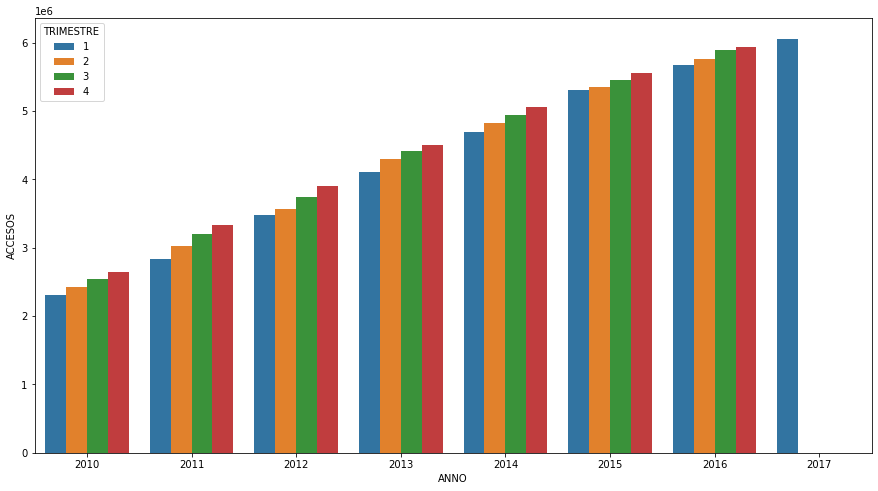

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x="ANNO", y="ACCESOS", data=pd.DataFrame(acceso_internetF1.groupby(['ANNO', 'TRIMESTRE']).ACCESOS.sum().sort_values(ascending=False)).reset_index(level=[0,1]),hue='TRIMESTRE')

De la grafica anterior podemos ver que desde el 2010 hasta 2017 fue incrementando el numero de clientes

In [ ]:
acceso_internetF2.isnull().sum()

ANNO                             0
TRIMESTRE                        0
ID_EMPRESA                       0
EMPRESA                          0
ID_MUNICIPIO                     0
MUNICIPIO                        0
ID_DEPARTAMENTO                  0
DEPARTAMENTO                     0
ID_SEGMENTO                      0
SEGMENTO                         0
VELOCIDAD_EFECTIVA_DOWNSTREAM    0
VELOCIDAD_EFECTIVA_UPSTREAM      0
ID_TECNOLOGIA                    0
TECNOLOGIA                       0
ACCESOS                          0
dtype: int64

Al igual que el dataset anterior, podemos ver que este tampoco posee datos nulos

In [ ]:
acceso_internetF2.loc[acceso_internetF2.TRIMESTRE==1].groupby('ANNO').DEPARTAMENTO.value_counts().sort_values(ascending=False)

ANNO  DEPARTAMENTO
2022  CUNDINAMARCA    15133
      ANTIOQUIA       14541
2021  CUNDINAMARCA    13148
      ANTIOQUIA       12358
2020  ANTIOQUIA       11481
                      ...  
      VAUPÉS             38
2022  VAUPÉS             37
2019  VAUPÉS             35
2021  VAUPÉS             34
2018  GUAINÍA            31
Name: DEPARTAMENTO, Length: 165, dtype: int64

A diferencia de los datos pasados, podemos ver que en los ultimos años, presenta mas reportes de accesos unico Cundinamarca que Antioquia.

In [ ]:
acceso_internetF2.loc[acceso_internetF2.TRIMESTRE==1].groupby('ANNO').MUNICIPIO.value_counts().sort_values(ascending=False)

ANNO  MUNICIPIO   
2022  BOGOTÁ, D.C.    3232
2021  BOGOTÁ, D.C.    2274
2022  CALI            2031
2020  BOGOTÁ, D.C.    2017
2019  BOGOTÁ, D.C.    1670
                      ... 
      SAN FELIPE         1
2021  CACAHUAL           1
      LA GUADALUPE       1
      PACOA              1
2022  YAVARATÉ           1
Name: MUNICIPIO, Length: 5151, dtype: int64

Al igual que los datos pasados, el municipio con mas reportesunicos sigue siendo la Capital

In [ ]:
acceso_internetF2.loc[acceso_internetF2.TRIMESTRE==1].groupby(['MUNICIPIO',"ANNO"]).ACCESOS.sum().sort_values(ascending=False).head(15)

MUNICIPIO     ANNO
BOGOTÁ, D.C.  2022    2188444
              2021    2137081
              2020    1956766
              2019    1874506
              2018    1826350
MEDELLÍN      2022     714990
              2021     683096
              2020     632088
              2019     600822
              2018     574317
CALI          2022     545519
              2021     542588
              2020     502387
              2019     482177
              2018     458709
Name: ACCESOS, dtype: int64

Con respecto a los años anteriores, podemos notar que siguen siendo los mismos municipios los que tienen mayor numero de clientes

Ahora miremos las empresas con mas clientes durante los ultimos años

In [ ]:
acceso_internetF2.loc[acceso_internetF2.TRIMESTRE==1].groupby(['EMPRESA',"ANNO"]).ACCESOS.sum().sort_values(ascending=False).head(10)

EMPRESA                              ANNO
COMUNICACION CELULAR S A COMCEL S A  2022    3250531
                                     2021    3175493
                                     2020    2747552
TELMEX COLOMBIA S.A.                 2019    2562264
                                     2018    2384831
UNE EPM TELECOMUNICACIONES S.A.      2022    1762784
                                     2021    1657301
                                     2020    1517996
                                     2019    1415373
                                     2018    1311196
Name: ACCESOS, dtype: int64

Se puede ver claramente que COMUNICACION CELULAR S A COMCEL S A es la que mas clientes posee en los ultimos años, tambien se conoce como **Claro**, sin embargo podemos ver que no fue la primera en 2019 ni 2018, por lo cual miremos quienes son las empresas con mas clientes desde 2018 hasta 2022

In [ ]:
acceso_internetF2.loc[acceso_internetF2.ANNO==2018].loc[acceso_internetF2.TRIMESTRE==1].groupby('EMPRESA').ACCESOS.sum().sort_values(ascending=False).head(10)

EMPRESA
TELMEX COLOMBIA S.A.                                        2384831
UNE EPM TELECOMUNICACIONES S.A.                             1311196
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.                      986358
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP             654486
EDATEL S.A.                                                  198338
AZTECA COMUNICACIONES COLOMBIA S.A.S                         173186
DIRECTV COLOMBIA LTDA                                        154705
EMPRESA DE TELECOMUNICACIONES DE BUCARAMANGA S.A. E.S.P.     131893
METROTEL S.A                                                 118505
EMPRESAS MUNICIPALES DE CALI EICE E.S.P                      106380
Name: ACCESOS, dtype: int64

In [ ]:
acceso_internetF2.loc[acceso_internetF2.ANNO==2019].loc[acceso_internetF2.TRIMESTRE==1].groupby('EMPRESA').ACCESOS.sum().sort_values(ascending=False).head(10)

EMPRESA
TELMEX COLOMBIA S.A.                                        2562264
UNE EPM TELECOMUNICACIONES S.A.                             1415373
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.                      997198
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP             627557
EDATEL S.A.                                                  207084
DIRECTV COLOMBIA LTDA                                        173621
AZTECA COMUNICACIONES COLOMBIA S.A.S                         150371
EMPRESAS MUNICIPALES DE CALI EICE E.S.P                      111963
EMPRESA DE TELECOMUNICACIONES DE BUCARAMANGA S.A. E.S.P.     111334
METROTEL S.A                                                  83024
Name: ACCESOS, dtype: int64

In [ ]:
acceso_internetF2.loc[acceso_internetF2.ANNO==2020].loc[acceso_internetF2.TRIMESTRE==1].groupby('EMPRESA').ACCESOS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                         2747552
UNE EPM TELECOMUNICACIONES S.A.                             1517996
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.                     1005305
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP             642487
DIRECTV COLOMBIA LTDA                                        203460
EDATEL S.A.                                                  187353
EMPRESAS MUNICIPALES DE CALI EICE E.S.P                      113699
EMPRESA DE TELECOMUNICACIONES DE BUCARAMANGA S.A. E.S.P.      92935
H V TELEVISION S.A.S.                                         80501
METROTEL S.A                                                  71125
Name: ACCESOS, dtype: int64

Note que no aparece Telmex, esto es debido a que en este año se fuciona comcel y Telmex

In [ ]:
acceso_internetF2.loc[acceso_internetF2.ANNO==2021].loc[acceso_internetF2.TRIMESTRE==1].groupby('EMPRESA').ACCESOS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 3175493
UNE EPM TELECOMUNICACIONES S.A.                     1657301
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             1168215
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP     703246
DIRECTV COLOMBIA LTDA                                190198
EDATEL S.A.                                          178029
EMPRESAS MUNICIPALES DE CALI EICE E.S.P              109525
H V TELEVISION S.A.S.                                102308
LEGON TELECOMUNICACIONES S.A.S.                       43065
SISTEMAS Y TELECOMUNICACIONES DEL ORIENTE SAS         26241
Name: ACCESOS, dtype: int64

In [ ]:
acceso_internetF2.loc[acceso_internetF2.ANNO==2022].loc[acceso_internetF2.TRIMESTRE==1].groupby('EMPRESA').ACCESOS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 3250531
UNE EPM TELECOMUNICACIONES S.A.                     1762784
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             1207659
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP     685367
DIRECTV COLOMBIA LTDA                                164829
EDATEL S.A.                                          155920
DIALNET DE COLOMBIA S.A   ESP.                       110396
H V TELEVISION S.A.S.                                108103
EMPRESAS MUNICIPALES DE CALI EICE E.S.P               85535
RURALINK S.A.S                                        41774
Name: ACCESOS, dtype: int64

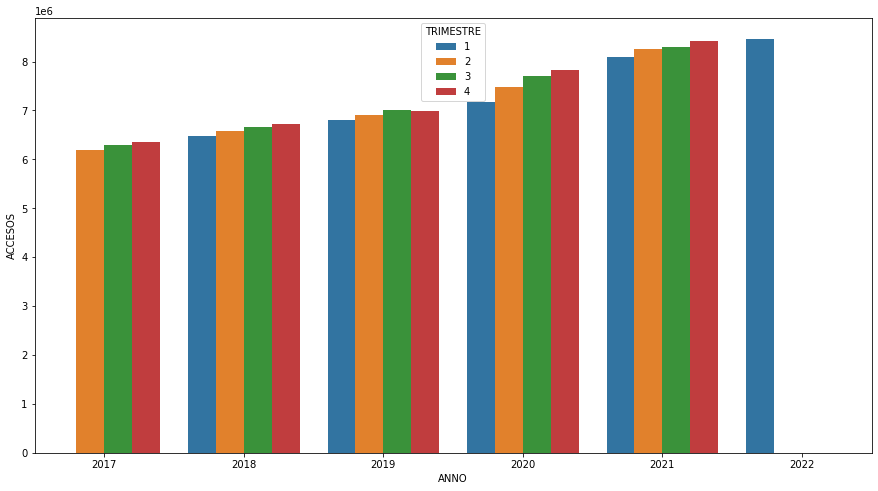

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x="ANNO", y="ACCESOS", data=pd.DataFrame(acceso_internetF2.groupby(['ANNO', 'TRIMESTRE']).ACCESOS.sum().sort_values(ascending=False)).reset_index(level=[0,1]),hue='TRIMESTRE')

Al igual que los años anteriores se puede ver como se incrementa el numero de clientes, sin embargo miremos una grafica de todos los años juntos

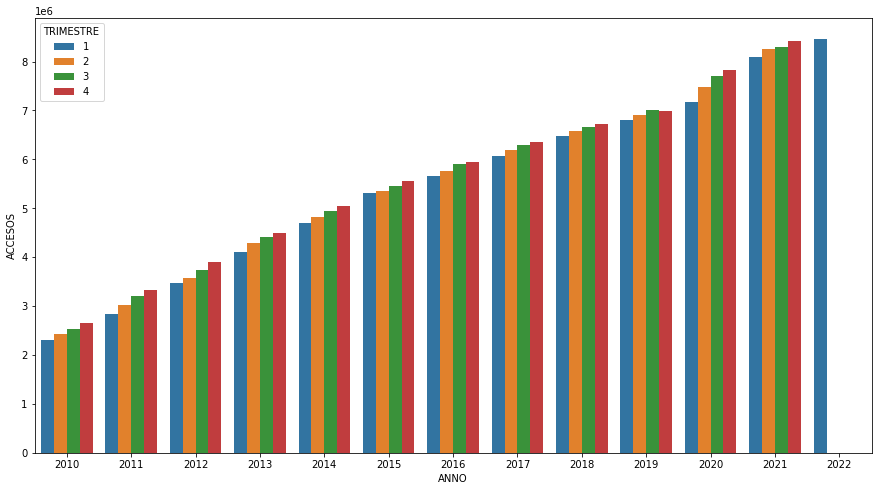

In [ ]:
F1=pd.DataFrame(acceso_internetF1.groupby(['ANNO', 'TRIMESTRE']).ACCESOS.sum().sort_values(ascending=False)).reset_index(level=[0,1])
F2=pd.DataFrame(acceso_internetF2.groupby(['ANNO', 'TRIMESTRE']).ACCESOS.sum().sort_values(ascending=False)).reset_index(level=[0,1])
F3=pd.concat([F1,F2])
plt.figure(figsize = (15,8))
sns.barplot(x="ANNO", y="ACCESOS", data=F3,hue='TRIMESTRE')

Note que el año en el que mas se incremento el numero de clientes fue en 2020, lo cual seguramente es debido a la pandemia

In [ ]:
acceso_internetF2.loc[acceso_internetF2.TRIMESTRE==1].groupby('ANNO').ACCESOS.sum().sort_values(ascending=False)

ANNO
2022    8469488
2021    8093695
2020    7163532
2019    6800178
2018    6479281
Name: ACCESOS, dtype: int64

Como se menciono anteriormente, se puede ver como en 2020 se incremento casi en 900,000 el numero de usuarios

In [ ]:
pd.DataFrame(acceso_internetF2.loc[acceso_internetF2.TRIMESTRE==1].groupby(["ANNO","MUNICIPIO"]).ACCESOS.sum().sort_values(ascending=False)).reset_index(level=[0,1])

,ANNO,MUNICIPIO,ACCESOS
0,2022,"BOGOTÁ, D.C.",2188444
1,2021,"BOGOTÁ, D.C.",2137081
2,2020,"BOGOTÁ, D.C.",1956766
3,2019,"BOGOTÁ, D.C.",1874506
4,2018,"BOGOTÁ, D.C.",1826350
...,...,...,...
5146,2022,PAPUNAHUA,1
5147,2020,PANA PANA,1
5148,2018,LA LLANADA,1
5149,2018,POLONUEVO,1


La tabla anterior corresponde al numero de clientes por municipio, ahora miremos la grafica para ver los principales municipios y departamentos por año

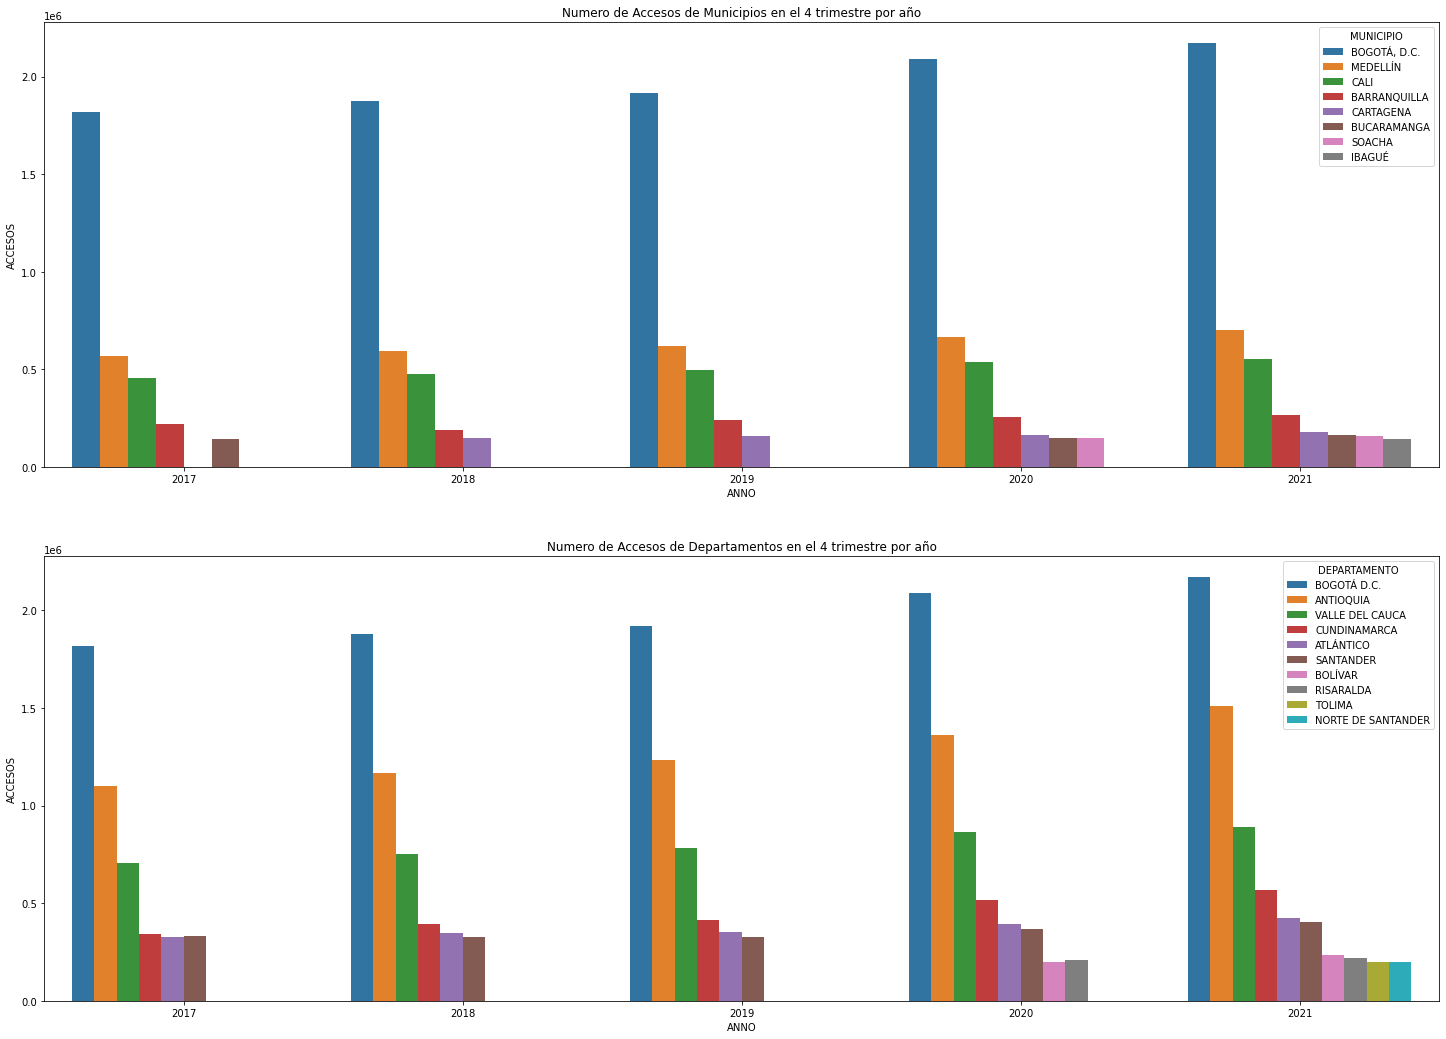

In [ ]:

figure, axes = plt.subplots(2, 1, sharex=False, figsize = (25,18))
axes[0].set_title('Numero de Accesos de Municipios en el 4 trimestre por año')
axes[1].set_title('Numero de Accesos de Departamentos en el 4 trimestre por año')
sns.barplot(ax=axes[0],x="ANNO", y="ACCESOS", data=pd.DataFrame(acceso_internetF2.loc[acceso_internetF2.TRIMESTRE==4].groupby(["ANNO","MUNICIPIO"]).ACCESOS.sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(30),hue='MUNICIPIO')
sns.barplot(ax=axes[1],x="ANNO", y="ACCESOS", data=pd.DataFrame(acceso_internetF2.loc[acceso_internetF2.TRIMESTRE==4].groupby(["ANNO","DEPARTAMENTO"]).ACCESOS.sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(36),hue='DEPARTAMENTO')

Esta informacion ya la habiamos hallado, sin embargo con la grafica nos podemos dar cuenta la diferencia tan marcada tiene el municipio de bogota con respecto a los demas, ademas de la diferencia tan notoria que se tenia en 2017 entre los 3 primeros departamentos  y el resto, esto nos da a entender que en los ultimos años estos departamentos puden estar creciendo mas en % que los 3 primeros.

###Telefonía Local

Para comenzar miremos la cantida de datos nulos

In [ ]:
lineas_telefonial.isnull().sum()

ANNO                    0
TRIMESTRE               0
ID_EMPRESA              0
EMPRESA                 0
ID_DEPARTAMENTO         2
DEPARTAMENTO            2
ID_MUNICIPIO            0
MUNICIPIO               2
ID_UBICACION            0
UBICACION          103502
ID_SEGMENTO             0
SEGMENTO                0
LINEAS                  0
dtype: int64

Aunque hay una gran cantidad de datos nulos en la ubicacion, esto no es un problema debido a que se utilizara la informacion de Municipio y Departamento.


In [ ]:
lineas_telefonial.loc[lineas_telefonial.TRIMESTRE==1].groupby('ANNO').DEPARTAMENTO.value_counts().sort_values(ascending=False)

ANNO  DEPARTAMENTO
2017  ANTIOQUIA       1368
2014  ANTIOQUIA       1337
2016  ANTIOQUIA       1330
2015  ANTIOQUIA       1326
2013  ANTIOQUIA       1321
                      ... 
2021  GUAINÍA            4
2018  VAUPÉS             4
2021  VAUPÉS             4
2018  VICHADA            4
      GUAINÍA            4
Name: DEPARTAMENTO, Length: 354, dtype: int64

Note que el departamento con mas reportes es antioquia, lo cual tambien ocurrio con el internet

In [ ]:
lineas_telefonial.loc[lineas_telefonial.TRIMESTRE==1].groupby('ANNO').MUNICIPIO.value_counts().sort_values(ascending=False)

ANNO  MUNICIPIO   
2013  CALI            71
2014  CALI            64
2016  CALI            60
2012  CALI            56
2017  BOGOTÁ, D.C.    52
                      ..
2020  IQUIRA           1
      LA CELIA         1
      LA MONTAÑITA     1
      LA PALMA         1
2022  ZAPATOCA         1
Name: MUNICIPIO, Length: 8899, dtype: int64

Sin embargo podemos ver que el municipio con mas reportes fue Cali en el 2013, lo que nos da a entender que ultimamente hay mas reportes colectivos

In [ ]:
lineas_telefonial.loc[lineas_telefonial.TRIMESTRE==1].groupby(['MUNICIPIO',"ANNO"]).LINEAS.sum().sort_values(ascending=False).head(15)

MUNICIPIO     ANNO
BOGOTÁ, D.C.  2012    2400116
              2021    2398201
              2015    2368165
              2013    2342554
              2014    2340430
              2016    2333410
              2017    2322207
              2020    2294598
              2018    2262804
              2019    2247095
              2022    2201942
IPIALES       2012    1425024
MEDELLÍN      2012     909631
              2013     867253
              2014     842699
Name: LINEAS, dtype: int64

Tal como se menciono anteriormente los reportes de Telefonia se esyan haciendo con lineas multiples, ya que 

In [ ]:
lineas_telefonial.loc[lineas_telefonial.TRIMESTRE==1].groupby(['EMPRESA',"ANNO"]).LINEAS.sum().sort_values(ascending=False).head(15)

EMPRESA                                           ANNO
COMUNICACION CELULAR S A COMCEL S A               2022    3101473
                                                  2021    2868033
                                                  2020    2626686
TELMEX COLOMBIA S.A.                              2019    2410964
                                                  2018    2177789
                                                  2017    1976496
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP  2012    1798703
TELMEX COLOMBIA S.A.                              2016    1757385
UNE EPM TELECOMUNICACIONES S.A.                   2022    1741777
                                                  2012    1677322
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP  2013    1659247
UNE EPM TELECOMUNICACIONES S.A.                   2021    1590491
                                                  2014    1587975
                                                  2013    1584828
TELMEX COLOMBIA S.A. 

In [ ]:
lineas_telefonial.loc[lineas_telefonial.ANNO==2018].loc[lineas_telefonial.TRIMESTRE==1].groupby('EMPRESA').LINEAS.sum().sort_values(ascending=False).head(10)

EMPRESA
TELMEX COLOMBIA S.A.                                        2177789
UNE EPM TELECOMUNICACIONES S.A.                             1520926
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.                     1280705
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP            1142817
EMPRESAS MUNICIPALES DE CALI EICE E.S.P                      309815
EMPRESA DE TELECOMUNICACIONES DE BUCARAMANGA S.A. E.S.P.     196393
METROTEL S.A                                                 137919
EDATEL S.A.                                                  134725
ERT SA ESP                                                    25626
EMPRESA DE TELECOMUNICACIONES DE POPAYAN S.A EMTEL E.S.P      11099
Name: LINEAS, dtype: int64

In [ ]:
lineas_telefonial.loc[lineas_telefonial.ANNO==2019].loc[lineas_telefonial.TRIMESTRE==1].groupby('EMPRESA').LINEAS.sum().sort_values(ascending=False).head(10)

EMPRESA
TELMEX COLOMBIA S.A.                                        2410964
UNE EPM TELECOMUNICACIONES S.A.                             1558904
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.                     1232339
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP            1045271
EMPRESAS MUNICIPALES DE CALI EICE E.S.P                      301390
EMPRESA DE TELECOMUNICACIONES DE BUCARAMANGA S.A. E.S.P.     163718
EDATEL S.A.                                                  116431
METROTEL S.A                                                 103357
ERT SA ESP                                                    24512
EMPRESA DE TELECOMUNICACIONES DE POPAYAN S.A EMTEL E.S.P      10133
Name: LINEAS, dtype: int64

In [ ]:
lineas_telefonial.loc[lineas_telefonial.ANNO==2020].loc[lineas_telefonial.TRIMESTRE==1].groupby('EMPRESA').LINEAS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                         2626686
UNE EPM TELECOMUNICACIONES S.A.                             1580458
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.                     1129888
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP            1021258
EMPRESAS MUNICIPALES DE CALI EICE E.S.P                      292525
EMPRESA DE TELECOMUNICACIONES DE BUCARAMANGA S.A. E.S.P.     138751
EDATEL S.A.                                                   95535
METROTEL S.A                                                  92502
ERT SA ESP                                                    23580
EMPRESA DE TELECOMUNICACIONES DE POPAYAN S.A EMTEL E.S.P       8711
Name: LINEAS, dtype: int64

In [ ]:
lineas_telefonial.loc[lineas_telefonial.ANNO==2021].loc[lineas_telefonial.TRIMESTRE==1].groupby('EMPRESA').LINEAS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                                      2868033
UNE EPM TELECOMUNICACIONES S.A.                                          1590491
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.                                  1373351
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP                         1069457
EMPRESAS MUNICIPALES DE CALI EICE E.S.P                                   242106
EDATEL S.A.                                                                73495
ERT SA ESP                                                                 20442
SISTEMAS SATELITALES DE COLOMBIA S.A  ESP                                   9958
EMPRESA DE TELECOMUNICACIONES DE POPAYAN S.A EMTEL E.S.P                    6691
UNIMOS EMPRESA MINICIPAL DE TELECOMUNICACIONES DE IPIALES S.A. E.S.P.       6600
Name: LINEAS, dtype: int64

In [ ]:
lineas_telefonial.loc[lineas_telefonial.ANNO==2022].loc[lineas_telefonial.TRIMESTRE==1].groupby('EMPRESA').LINEAS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                                      3101473
UNE EPM TELECOMUNICACIONES S.A.                                          1741777
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP                          970364
EMPRESAS MUNICIPALES DE CALI EICE E.S.P                                   216912
EDATEL S.A.                                                                67427
ERT SA ESP                                                                 15303
UNIMOS EMPRESA MINICIPAL DE TELECOMUNICACIONES DE IPIALES S.A. E.S.P.       6472
EMPRESA DE TELECOMUNICACIONES DE POPAYAN S.A EMTEL E.S.P                    4727
TPE COMUNICACIONES COLOMBIA SAS                                             1667
AVANTEL S.A.S                                                                  0
Name: LINEAS, dtype: int64

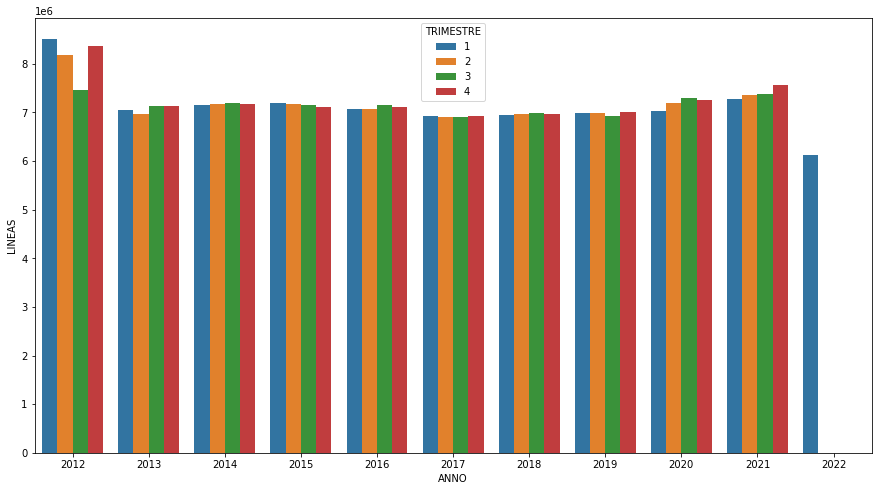

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x="ANNO", y="LINEAS", data=pd.DataFrame(lineas_telefonial.groupby(['ANNO', 'TRIMESTRE']).LINEAS.sum().sort_values(ascending=False)).reset_index(level=[0,1]),hue='TRIMESTRE')

In [ ]:
lineas_telefonial.loc[lineas_telefonial.TRIMESTRE==1].groupby('ANNO').LINEAS.sum().sort_values(ascending=False)

ANNO
2012    8518146
2021    7266897
2015    7195264
2014    7153332
2016    7079698
2013    7041130
2020    7031197
2019    6986028
2018    6952945
2017    6917780
2022    6126122
Name: LINEAS, dtype: int64

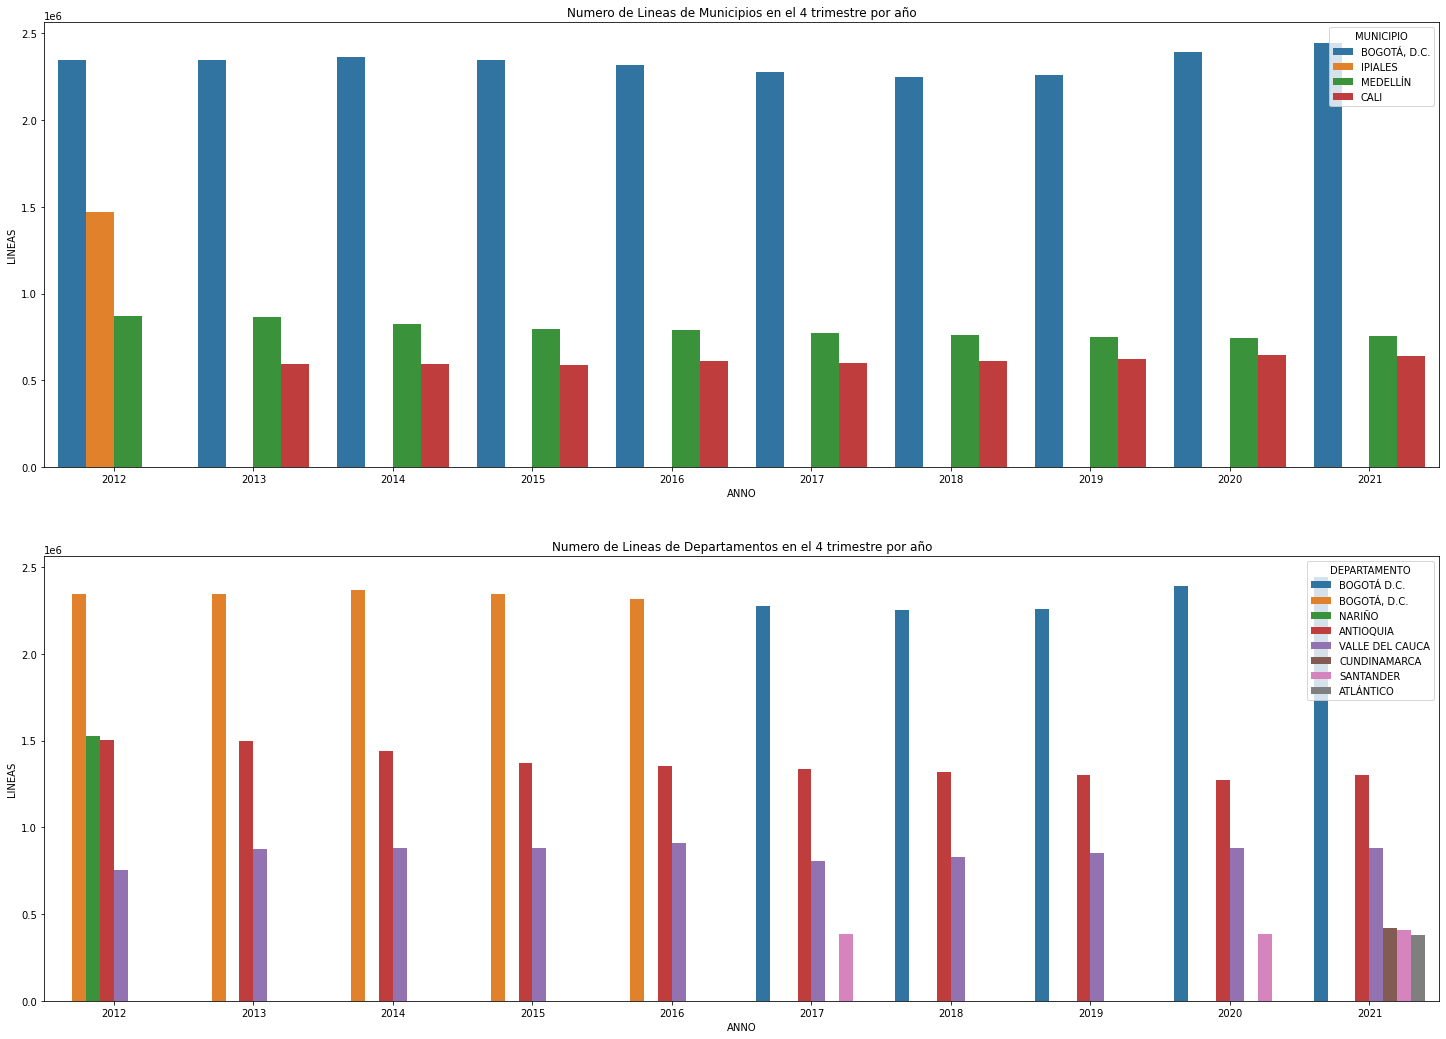

In [ ]:

figure, axes = plt.subplots(2, 1, sharex=False, figsize = (25,18))
axes[0].set_title('Numero de Lineas de Municipios en el 4 trimestre por año')
axes[1].set_title('Numero de Lineas de Departamentos en el 4 trimestre por año')
sns.barplot(ax=axes[0],x="ANNO", y="LINEAS", data=pd.DataFrame(lineas_telefonial.loc[lineas_telefonial.TRIMESTRE==4].groupby(["ANNO","MUNICIPIO"]).LINEAS.sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(30),hue='MUNICIPIO')
sns.barplot(ax=axes[1],x="ANNO", y="LINEAS", data=pd.DataFrame(lineas_telefonial.loc[lineas_telefonial.TRIMESTRE==4].groupby(["ANNO","DEPARTAMENTO"]).LINEAS.sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(36),hue='DEPARTAMENTO')

###Suscriptores e Ingresos de televisión por suscripción

In [ ]:
suscriptores_tv.isnull().sum()

ANNO                                   0
TRIMESTRE                              0
MES                                    0
TIPO_OPERADOR                     198703
ID_OPERADOR                            0
OPERADOR                               0
ID_DEPARTAMENTO                        0
DEPARTAMENTO                         686
ID_MUNICIPIO                           0
MUNICIPIO                            698
ESAL                                   0
SUSCRIPTORES                           0
SEGMENTO                               0
DESC_SEGMENTO                     355913
TIPO_TECNOLOGIA                        0
DES_TIPO_TECNOLOGIA_TELEVISION    355913
dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.TRIMESTRE==1].groupby('ANNO').DEPARTAMENTO.value_counts().sort_values(ascending=False)

ANNO  DEPARTAMENTO   
2022  ANTIOQUIA          6266
2021  ANTIOQUIA          6039
2022  CUNDINAMARCA       4680
2021  CUNDINAMARCA       4241
2022  VALLE DEL CAUCA    3013
                         ... 
2011  CALDAS                3
2012  CALDAS                3
      BOLÍVAR               3
2011  BOLÍVAR               3
2012  CAUCA                 3
Name: DEPARTAMENTO, Length: 382, dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.TRIMESTRE==1].groupby('ANNO').MUNICIPIO.value_counts().sort_values(ascending=False)

ANNO  MUNICIPIO   
2022  BOGOTÁ, D.C.    321
2021  BOGOTÁ, D.C.    308
2022  PEREIRA         284
      CALI            261
      MANIZALES       246
                     ... 
2021  PANA PANA         1
      LA GUADALUPE      1
2013  PACOA             1
2022  CACAHUAL          1
      PAPUNAUA          1
Name: MUNICIPIO, Length: 10383, dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.TRIMESTRE==1].groupby('ANNO').SUSCRIPTORES.value_counts().sort_values(ascending=False)

ANNO  SUSCRIPTORES
2022  1               5012
2021  1               4523
2017  0               3901
2019  0               3119
2022  2               2531
                      ... 
2015  1143               1
      1142               1
      1141               1
      1136               1
2022  350344             1
Name: SUSCRIPTORES, Length: 22138, dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.TRIMESTRE==1].groupby(['MUNICIPIO',"ANNO"]).SUSCRIPTORES.sum().sort_values(ascending=False).head(15)

MUNICIPIO     ANNO
BOGOTÁ, D.C.  2022    4489848
              2019    4441538
              2021    4351714
              2018    4280931
              2020    4109235
              2017    4086290
              2016    3770008
              2015    3617673
              2014    3417611
              2013    3183333
MEDELLÍN      2022    1797604
              2021    1656558
              2020    1602768
              2019    1506561
              2018    1450811
Name: SUSCRIPTORES, dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.TRIMESTRE==1].groupby(['OPERADOR',"ANNO"]).SUSCRIPTORES.sum().sort_values(ascending=False).head(15)

OPERADOR                             ANNO
COMUNICACION CELULAR S A COMCEL S A  2022    8728551
                                     2021    8341261
                                     2020    7865294
TELMEX COLOMBIA S.A.                 2019    7394779
                                     2018    7143104
                                     2017    6997357
                                     2016    6535519
                                     2015    6426225
                                     2014    6206861
                                     2013    5912990
                                     2012    5528719
                                     2011    5160371
                                     2010    5043169
UNE EPM TELECOMUNICACIONES S.A.      2022    4447889
                                     2021    4009340
Name: SUSCRIPTORES, dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.ANNO==2018].loc[suscriptores_tv.TRIMESTRE==1].groupby('OPERADOR').SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

OPERADOR
TELMEX COLOMBIA S.A.                                7143104
UNE EPM TELECOMUNICACIONES S.A.                     3424464
DIRECTV COLOMBIA LTDA                               2828595
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             1682581
H V TELEVISION S.A.S.                                437616
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP     380799
CONEXION DIGITAL EXPRESS SAS                          71408
LEGON TELECOMUNICACIONES S.A.S.                       63400
CABLEMAS S.A.S                                        50131
EMPRESAS MUNICIPALES DE CALI EICE E.S.P               48075
Name: SUSCRIPTORES, dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.ANNO==2019].loc[suscriptores_tv.TRIMESTRE==1].groupby('OPERADOR').SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

OPERADOR
TELMEX COLOMBIA S.A.                                7394779
UNE EPM TELECOMUNICACIONES S.A.                     3550405
DIRECTV COLOMBIA LTDA                               3162126
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             1734446
H V TELEVISION S.A.S.                                477368
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP     374462
LEGON TELECOMUNICACIONES S.A.S.                      106984
CONEXION DIGITAL EXPRESS SAS                          74961
CABLEMAS S.A.S                                        49990
EMPRESAS MUNICIPALES DE CALI EICE E.S.P               46627
Name: SUSCRIPTORES, dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.ANNO==2020].loc[suscriptores_tv.TRIMESTRE==1].groupby('OPERADOR').SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

OPERADOR
COMUNICACION CELULAR S A COMCEL S A                 7865294
UNE EPM TELECOMUNICACIONES S.A.                     3660721
DIRECTV COLOMBIA LTDA                               2848281
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             1594306
H V TELEVISION S.A.S.                                512618
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP     374453
TV CABLE SAN GIL S.A.S. " STV.NET SAS "              180922
LEGON TELECOMUNICACIONES S.A.S.                      103182
TEVECOM SAS                                           57939
TVN NORTE COMUNICACIONES SAS - TVN SAS                45267
Name: SUSCRIPTORES, dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.ANNO==2021].loc[suscriptores_tv.TRIMESTRE==1].groupby('OPERADOR').SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

OPERADOR
COMUNICACION CELULAR S A COMCEL S A                 8341261
UNE EPM TELECOMUNICACIONES S.A.                     4009340
DIRECTV COLOMBIA LTDA                               2382796
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             1582333
H V TELEVISION S.A.S.                                471901
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP     421427
CONEXION DIGITAL EXPRESS SAS                          67338
LEGON TELECOMUNICACIONES S.A.S.                       61005
EMPRESAS MUNICIPALES DE CALI EICE E.S.P               57150
CABLEMAS S.A.S                                        46537
Name: SUSCRIPTORES, dtype: int64

In [ ]:
suscriptores_tv.loc[suscriptores_tv.ANNO==2022].loc[suscriptores_tv.TRIMESTRE==1].groupby('OPERADOR').SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

OPERADOR
COMUNICACION CELULAR S A COMCEL S A                 8728551
UNE EPM TELECOMUNICACIONES S.A.                     4447889
DIRECTV COLOMBIA LTDA                               2246428
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             1722623
H V TELEVISION S.A.S.                                490061
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP     356999
CONEXION DIGITAL EXPRESS SAS                          88414
LEGON TELECOMUNICACIONES S.A.S.                       87056
CABLEMAS S.A.S                                        66564
EMPRESAS MUNICIPALES DE CALI EICE E.S.P               55091
Name: SUSCRIPTORES, dtype: int64

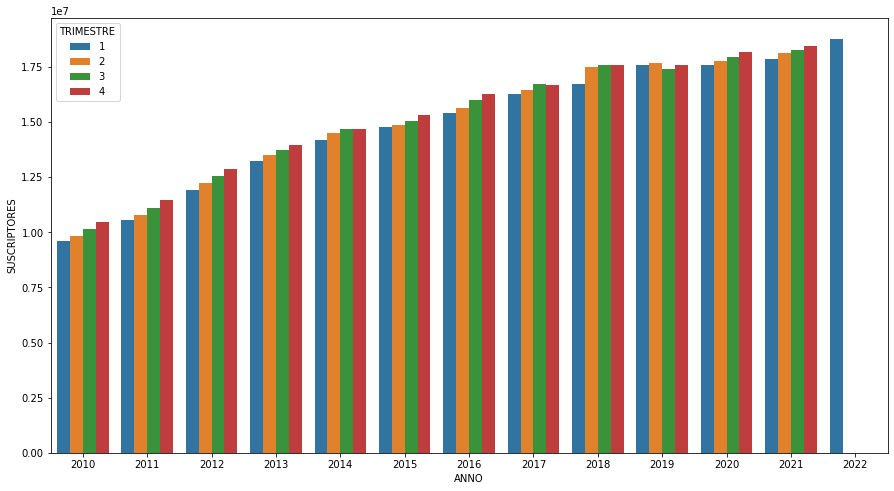

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x="ANNO", y="SUSCRIPTORES", data=pd.DataFrame(suscriptores_tv.groupby(['ANNO', 'TRIMESTRE']).SUSCRIPTORES.sum().sort_values(ascending=False)).reset_index(level=[0,1]),hue='TRIMESTRE')

In [ ]:
suscriptores_tv.loc[suscriptores_tv.TRIMESTRE==1].groupby('ANNO').SUSCRIPTORES.sum().sort_values(ascending=False)

ANNO
2022    18778408
2021    17852812
2020    17603738
2019    17574376
2018    16702090
2017    16264660
2016    15392795
2015    14780078
2014    14200242
2013    13210283
2012    11904638
2011    10549055
2010     9581428
Name: SUSCRIPTORES, dtype: int64

##Servicios Móviles

###Abonados, ingresos y tráfico de Internet móvil por demanda


Para comenzar miremos cuantos datos nulos tenemos

In [ ]:
Abonados_internetM.isnull().sum()

ANNO                 0
TRIMESTRE            0
MES_DEL_TRIMESTRE    0
ID_EMPRESA           0
EMPRESA              0
ID_MODALIDAD_PAGO    0
MODALIDAD_PAGO       0
ID_TERMINAL          0
TERMINAL             0
ID_TECNOLOGIA        0
TECNOLOGIA           0
CANTIDAD_ABONADOS    0
dtype: int64

In [ ]:
Abonados_internetM.loc[Abonados_internetM.TRIMESTRE==1].groupby(['ID_MODALIDAD_PAGO',"ANNO"]).CANTIDAD_ABONADOS.sum().sort_values(ascending=False).head(15)

ID_MODALIDAD_PAGO  ANNO
PRE                2022    61578206
                   2021    54715846
                   2020    51677817
                   2019    45300991
                   2018    42066224
                   2016    36378295
                   2017    35924007
                   2015    25678580
                   2014    19366991
                   2013     9672787
                   2012     4031295
POS                2013     3284398
                   2014     2719765
                   2015     2517921
                   2012     2227943
Name: CANTIDAD_ABONADOS, dtype: int64

Como se puede apreciar en la tabla anterior la mayotia de los clientes abonados estan en la modalidad de prepago, ademas de sto podemos ver que para el 2022 hay un total de 61,578,206 clientes, lo que implica que existen personas que cuentan con por lo menos 2 servicios.

In [ ]:
Abonados_internetM.loc[Abonados_internetM.TRIMESTRE==1].groupby(['EMPRESA',"ANNO"]).CANTIDAD_ABONADOS.sum().sort_values(ascending=False).head(15)

EMPRESA                                  ANNO
COMUNICACION CELULAR S A COMCEL S A      2022    33558752
                                         2021    30967331
                                         2020    29536572
                                         2018    25845464
                                         2019    25702461
                                         2016    24383100
                                         2017    23566159
                                         2015    18268782
                                         2014    15478630
COLOMBIA MOVIL  S.A ESP                  2022    12455508
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.  2022    10509567
COLOMBIA MOVIL  S.A ESP                  2021     9993281
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.  2021     9928776
                                         2020     9351092
COMUNICACION CELULAR S A COMCEL S A      2013     9121713
Name: CANTIDAD_ABONADOS, dtype: int64

En la tabla anterior se pueden ver las principales empresas por año, ahora mieremos las que tienen mas usuarios por año:

In [ ]:
Abonados_internetM.loc[Abonados_internetM.ANNO==2018].loc[Abonados_internetM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_ABONADOS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 25845464
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.              8103667
COLOMBIA MOVIL  S.A ESP                              6091708
VIRGIN MOBILE COLOMBIA S.A.S.                        1458008
AVANTEL S.A.S                                         995533
ALMACENES EXITO INVERSIONES S.A.S.                    828567
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      567397
UFF MOVIL SAS                                          35660
SUMA MOVIL S.A.S.                                        409
UNE EPM TELECOMUNICACIONES S.A.                            0
Name: CANTIDAD_ABONADOS, dtype: int64

In [ ]:
Abonados_internetM.loc[Abonados_internetM.ANNO==2019].loc[Abonados_internetM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_ABONADOS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 25702461
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.              8550650
COLOMBIA MOVIL  S.A ESP                              7201848
LOGISTICA FLASH COLOMBIA S.A.S                       1365042
AVANTEL S.A.S                                        1287058
VIRGIN MOBILE COLOMBIA S.A.S.                        1142619
ALMACENES EXITO INVERSIONES S.A.S.                    694515
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      472145
SUMA MOVIL S.A.S.                                       2430
Name: CANTIDAD_ABONADOS, dtype: int64

In [ ]:
Abonados_internetM.loc[Abonados_internetM.ANNO==2020].loc[Abonados_internetM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_ABONADOS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 29536572
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.              9351092
COLOMBIA MOVIL  S.A ESP                              9110100
VIRGIN MOBILE COLOMBIA S.A.S.                        1984619
AVANTEL S.A.S                                         909011
ALMACENES EXITO INVERSIONES S.A.S.                    625228
LOGISTICA FLASH COLOMBIA S.A.S                        538920
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      414432
SUMA MOVIL S.A.S.                                       7233
Name: CANTIDAD_ABONADOS, dtype: int64

In [ ]:
Abonados_internetM.loc[Abonados_internetM.ANNO==2021].loc[Abonados_internetM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_ABONADOS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 30967331
COLOMBIA MOVIL  S.A ESP                              9993281
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.              9928776
VIRGIN MOBILE COLOMBIA S.A.S.                        1905610
AVANTEL S.A.S                                         972885
ALMACENES EXITO INVERSIONES S.A.S.                    613111
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      340703
LOGISTICA FLASH COLOMBIA S.A.S                        337766
SETROC MOBILE GROUP SAS                                59090
SUMA MOVIL S.A.S.                                       9859
Name: CANTIDAD_ABONADOS, dtype: int64

In [ ]:
Abonados_internetM.loc[Abonados_internetM.ANNO==2022].loc[Abonados_internetM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_ABONADOS.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 33558752
COLOMBIA MOVIL  S.A ESP                             12455508
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             10509567
VIRGIN MOBILE COLOMBIA S.A.S.                        1927570
PARTNERS TELECOM COLOMBIA SAS                        1629628
ALMACENES EXITO INVERSIONES S.A.S.                   1032497
AVANTEL S.A.S                                         255581
LOGISTICA FLASH COLOMBIA S.A.S                        212198
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      202472
SUMA MOVIL S.A.S.                                      25307
Name: CANTIDAD_ABONADOS, dtype: int64

Note que para el 2022 Comcel (Claro) tien mas de el 50% de usuarios, ademas de esto podemos ver como la seguna empresa COLOMBIA MOVIL  S.A ESP (Tigo) es la seguna empresa y tiene casi la tercera parte de los usuarios de Comcel.

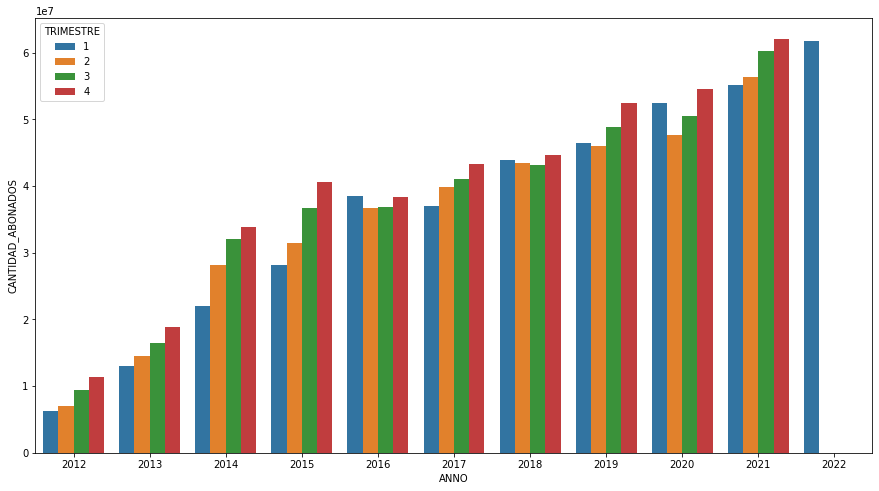

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x="ANNO", y="CANTIDAD_ABONADOS", data=pd.DataFrame(Abonados_internetM.groupby(['ANNO', 'TRIMESTRE']).CANTIDAD_ABONADOS.sum().sort_values(ascending=False)).reset_index(level=[0,1]),hue='TRIMESTRE')

Aunque sigue creciendo el numero de usuarios, se puede notar que el mayor crecimiento se dio de 2012- 2015, lo cual lo podemos ver con el numero total de usuarios por año

In [ ]:
Abonados_internetM.loc[Abonados_internetM.TRIMESTRE==1].groupby('ANNO').CANTIDAD_ABONADOS.sum().sort_values(ascending=False)

ANNO
2022    61821077
2021    55128412
2020    52477207
2019    46418768
2018    43926413
2016    38490107
2017    36990571
2015    28196501
2014    22086756
2013    12957185
2012     6259238
Name: CANTIDAD_ABONADOS, dtype: int64

Note que de 2012 a 2015 aumento casi 4 veces la cantidad, del 2015 al 2018 aumento menos del doble y del 2018 al 2021 aumento menos de la mitad, lo que nos indica que a medida que pasa el tiempo esta bajando el % de nuevos usuarios

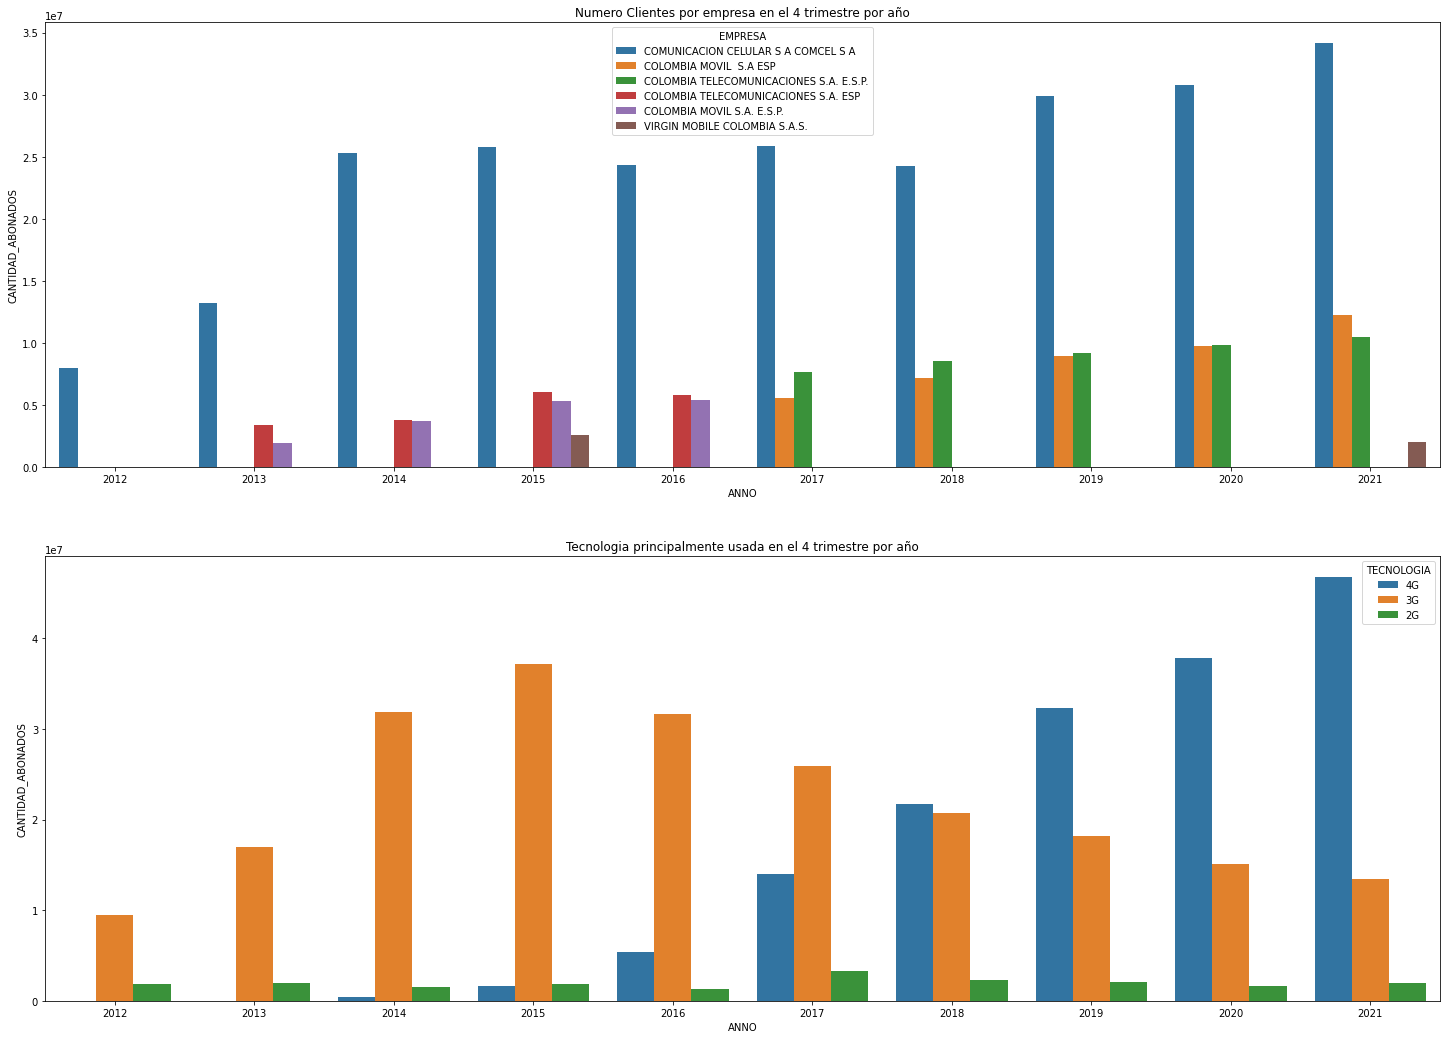

In [ ]:

figure, axes = plt.subplots(2, 1, sharex=False, figsize = (25,18))
axes[0].set_title('Numero Clientes por empresa en el 4 trimestre por año')
axes[1].set_title('Tecnologia principalmente usada en el 4 trimestre por año')
sns.barplot(ax=axes[0],x="ANNO", y="CANTIDAD_ABONADOS", data=pd.DataFrame(Abonados_internetM.loc[Abonados_internetM.TRIMESTRE==4].groupby(["ANNO","EMPRESA"]).CANTIDAD_ABONADOS.sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(30),hue='EMPRESA')
sns.barplot(ax=axes[1],x="ANNO", y="CANTIDAD_ABONADOS", data=pd.DataFrame(Abonados_internetM.loc[Abonados_internetM.TRIMESTRE==4].groupby(["ANNO","TECNOLOGIA"]).CANTIDAD_ABONADOS.sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(36),hue='TECNOLOGIA')

En esta grafica podemos notar como comcel domina el mercado y como se dio la transicion de la tecnologia 3G a la 4G

### Abonados, ingresos y tráfico de telefonía móvil


Primero miremos si hay datos nulos:

In [ ]:
Abonados_vozM.isnull().sum()

ANNO            0
TRIMESTRE       0
MODALIDAD       0
ID_PROVEEDOR    0
PROVEEDOR       0
 ABONADOS       0
dtype: int64

In [ ]:
Abonados_vozM.loc[Abonados_vozM.TRIMESTRE==1].groupby(['MODALIDAD',"ANNO"])[" ABONADOS "].sum().sort_values(ascending=False).head(15)

MODALIDAD  ANNO
PREPAGO    2022    57764623
           2021    54428156
           2020    52417630
           2019    51521652
           2018    49995033
           2017    46876130
           2016    45810700
           2015    45073218
           2014    40763026
           2012    38430567
           2011    37727639
           2013    36919511
POSPAGO    2022    18227235
           2021    15014197
           2020    14074867
Name:  ABONADOS , dtype: int64

De la tabla anterior podemos deducir lo mismo que en el internet por demanda ya que el numro de usuario vuelve a exceder el numero de habitantes en colombia

In [ ]:
Abonados_vozM.loc[Abonados_vozM.TRIMESTRE==1].groupby(['PROVEEDOR',"ANNO"])[" ABONADOS "].sum().sort_values(ascending=False).head(15)

PROVEEDOR                             ANNO
COMUNICACION CELULAR S A COMCEL S A   2022    35709820
                                      2021    33461107
                                      2020    31243664
                                      2011    30014228
                                      2019    29887101
                                      2015    29833618
                                      2018    29401088
                                      2014    29209759
                                      2017    29153144
                                      2012    29019994
                                      2016    28339861
                                      2013    27660868
COLOMBIA TELECOMUNICACIONES S.A. ESP  2022    18866239
                                      2021    16709452
                                      2020    15913964
Name:  ABONADOS , dtype: int64

Al igual que con el internet COMUNICACION CELULAR S A COMCEL S A (Claro) domina en numero de usuarios, es tan fuerte el dominio de esta empresa que los ususarios que tenia en 2013 son mas que los de COLOMBIA TELECOMUNICACIONES S.A. ESP (Movistar) en 2022. Ahora miremos las principales empresas por año:

In [ ]:
Abonados_vozM.loc[Abonados_vozM.ANNO==2018].loc[Abonados_vozM.TRIMESTRE==1].groupby('PROVEEDOR')[" ABONADOS "].sum().sort_values(ascending=False).head(10)

PROVEEDOR
COMUNICACION CELULAR S A COMCEL S A                  29401088
COLOMBIA TELECOMUNICACIONES S.A. ESP                 14716140
COLOMBIA MOVIL S.A. E.S.P.                           11563717
VIRGIN MOBILE COLOMBIA S.A.S.                         2820484
AVANTEL S.A.S.                                        2015538
ALMACENES EXITO INVERSIONES S.A.S.                    1578026
EMPRESA DE TELECOMUNICACIONES DE BOGOTÁ S.A. ESP.      587956
UFF MOVIL SAS                                           80638
SUMA MOVIL SAS                                            409
UNE EPM TELECOMUNICACIONES S.A.                             0
Name:  ABONADOS , dtype: int64

In [ ]:
Abonados_vozM.loc[Abonados_vozM.ANNO==2019].loc[Abonados_vozM.TRIMESTRE==1].groupby('PROVEEDOR')[" ABONADOS "].sum().sort_values(ascending=False).head(10)

PROVEEDOR
COMUNICACION CELULAR S A COMCEL S A                  29887101
COLOMBIA TELECOMUNICACIONES S.A. ESP                 15884252
COLOMBIA MOVIL S.A. E.S.P.                           11555856
VIRGIN MOBILE COLOMBIA S.A.S.                         2735382
AVANTEL S.A.S.                                        2286642
ALMACENES EXITO INVERSIONES S.A.S.                    1542278
LOGISTICA FLASH COLOMBIA S.A.S                         629210
EMPRESA DE TELECOMUNICACIONES DE BOGOTÁ S.A. ESP.      444180
SUMA MOVIL SAS                                           3370
UFF MOVIL SAS                                               0
Name:  ABONADOS , dtype: int64

In [ ]:
Abonados_vozM.loc[Abonados_vozM.ANNO==2020].loc[Abonados_vozM.TRIMESTRE==1].groupby('PROVEEDOR')[" ABONADOS "].sum().sort_values(ascending=False).head(10)

PROVEEDOR
COMUNICACION CELULAR S A COMCEL S A                  31243664
COLOMBIA TELECOMUNICACIONES S.A. ESP                 15913964
COLOMBIA MOVIL S.A. E.S.P.                           11808184
VIRGIN MOBILE COLOMBIA S.A.S.                         2973265
AVANTEL S.A.S.                                        2250770
ALMACENES EXITO INVERSIONES S.A.S.                    1606947
EMPRESA DE TELECOMUNICACIONES DE BOGOTÁ S.A. ESP.      392763
LOGISTICA FLASH COLOMBIA S.A.S                         291210
SUMA MOVIL SAS                                          11730
UFF MOVIL SAS                                               0
Name:  ABONADOS , dtype: int64

In [ ]:
Abonados_vozM.loc[Abonados_vozM.ANNO==2021].loc[Abonados_vozM.TRIMESTRE==1].groupby('PROVEEDOR')[" ABONADOS "].sum().sort_values(ascending=False).head(10)

PROVEEDOR
COMUNICACION CELULAR S A COMCEL S A                  33461107
COLOMBIA TELECOMUNICACIONES S.A. ESP                 16709452
COLOMBIA MOVIL S.A. E.S.P.                           13040917
VIRGIN MOBILE COLOMBIA S.A.S.                         2980494
ALMACENES EXITO INVERSIONES S.A.S.                    1381616
AVANTEL S.A.S.                                        1300395
EMPRESA DE TELECOMUNICACIONES DE BOGOTÁ S.A. ESP.      322089
LOGISTICA FLASH COLOMBIA S.A.S                         207362
SETROC MOBILE GROUP SAS                                 24511
SUMA MOVIL SAS                                          14410
Name:  ABONADOS , dtype: int64

In [ ]:
Abonados_vozM.loc[Abonados_vozM.ANNO==2022].loc[Abonados_vozM.TRIMESTRE==1].groupby('PROVEEDOR')[" ABONADOS "].sum().sort_values(ascending=False).head(10)

PROVEEDOR
COMUNICACION CELULAR S A COMCEL S A                  35709820
COLOMBIA TELECOMUNICACIONES S.A. ESP                 18866239
COLOMBIA MOVIL S.A. E.S.P.                           14711493
VIRGIN MOBILE COLOMBIA S.A.S.                         2720683
PARTNERS TELECOM COLOMBIA SAS                         1930027
ALMACENES EXITO INVERSIONES S.A.S.                    1251017
AVANTEL S.A.S.                                         322457
EMPRESA DE TELECOMUNICACIONES DE BOGOTÁ S.A. ESP.      238221
LOGISTICA FLASH COLOMBIA S.A.S                         169887
SETROC MOBILE GROUP SAS                                 48109
Name:  ABONADOS , dtype: int64

Note que en todos los años menos el ultimo comcel tuvo mas de el doble de clientes que el segundo lugar.

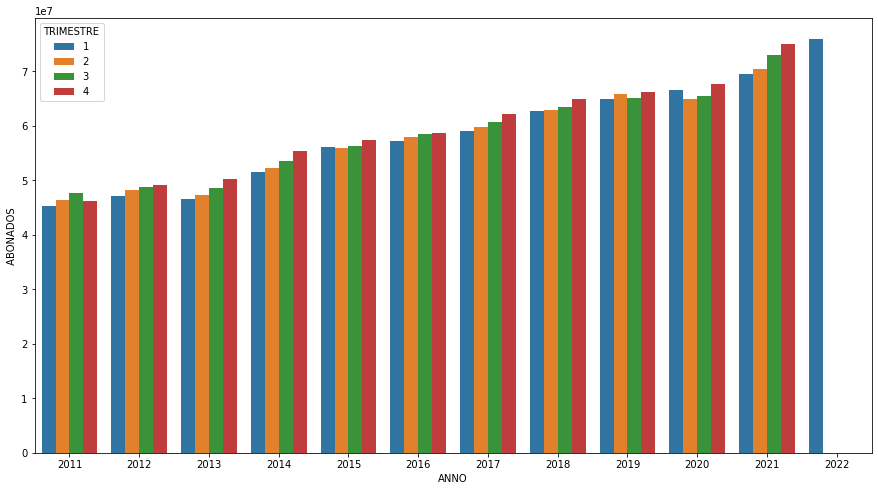

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x="ANNO", y=" ABONADOS ", data=pd.DataFrame(Abonados_vozM.groupby(['ANNO', 'TRIMESTRE'])[" ABONADOS "].sum().sort_values(ascending=False)).reset_index(level=[0,1]),hue='TRIMESTRE')

A diferencia de el internet movil, se puede ver que hay un fuerte crecimiento en en 2021, lo cual puede ser consecuencias de la pandemia

In [ ]:
Abonados_vozM.loc[Abonados_vozM.TRIMESTRE==1].groupby('ANNO')[" ABONADOS "].sum().sort_values(ascending=False)

ANNO
2022    75991858
2021    69442353
2020    66492497
2019    64968271
2018    62763996
2017    59074868
2016    57292621
2015    56139892
2014    51594619
2012    47172785
2013    46513100
2011    45342049
Name:  ABONADOS , dtype: int64

Tal como se dijo anteriormente en 2021 entraron aproximadamente 6 millones de usuraios, lo cual representa un incremento de casi el 8% total, que seria el mayor de los ultimos años.

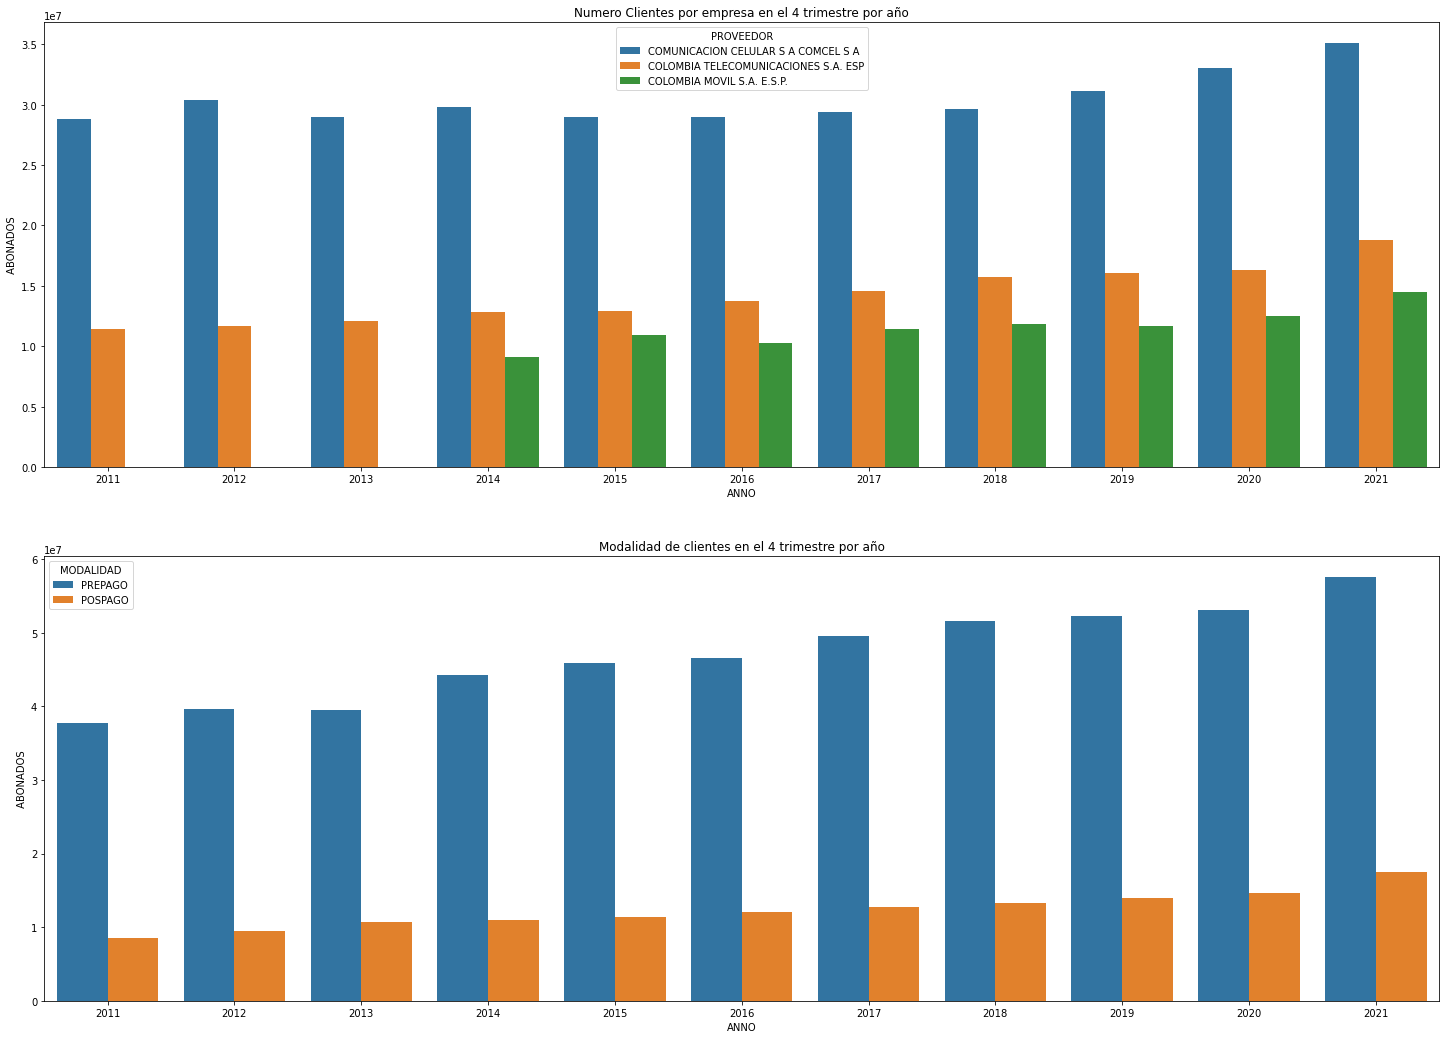

In [ ]:

figure, axes = plt.subplots(2, 1, sharex=False, figsize = (25,18))
axes[0].set_title('Numero Clientes por empresa en el 4 trimestre por año')
axes[1].set_title('Modalidad de clientes en el 4 trimestre por año')
sns.barplot(ax=axes[0],x="ANNO", y=" ABONADOS ", data=pd.DataFrame(Abonados_vozM.loc[Abonados_vozM.TRIMESTRE==4].groupby(["ANNO","PROVEEDOR"])[" ABONADOS "].sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(30),hue='PROVEEDOR')
sns.barplot(ax=axes[1],x="ANNO", y=" ABONADOS ", data=pd.DataFrame(Abonados_vozM.loc[Abonados_vozM.TRIMESTRE==4].groupby(["ANNO","MODALIDAD"])[" ABONADOS "].sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(36),hue='MODALIDAD')

En esta grafica se puede ver como comcel domina el mercado y como la mayoria de usarios son de modalidad prepago

### Suscriptores, ingresos y tráfico de Internet móvil por cargo fijo



El numero tan bajo de personas pospago en los anteriores dataset se debe a que estas en su mayoria cuenta con un plan de cargo fijo, para comenzar miermos la cantidad de valores nulos

In [ ]:
Abonados_internetCFM.isnull().sum()

ANNO                     0
TRIMESTRE                0
MES_DEL_TRIMESTRE        0
ID_SEGMENTO              0
SEGMENTO                 0
ID_EMPRESA               0
EMPRESA                  0
ID_TERMINAL              0
TERMINAL                 0
ID_TECNOLOGIA            0
TECNOLOGIA               0
CANTIDAD_SUSCRIPTORES    0
dtype: int64

In [ ]:
Abonados_internetCFM.loc[Abonados_internetCFM.TRIMESTRE==1].groupby(['SEGMENTO',"ANNO"]).CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False).head(15)

SEGMENTO  ANNO
Personas  2022    41293613
          2021    33343523
          2020    30492873
          2019    28268171
          2018    25500193
          2017    23875682
          2016    18547129
          2015    14851835
          2014    12447108
Empresas  2022     9112353
Personas  2013     8620911
Empresas  2021     8232022
          2020     7591366
          2019     7155620
          2018     6699445
Name: CANTIDAD_SUSCRIPTORES, dtype: int64

Al igual que con los datos anteriores se puede ver que elnumero de usuarios en 2022 excede el numero de la poblacion en colombia, lo que nos puede dar a entender que hay personas con 2 o mas planes. Por otra parte podemos ver que la cantidad de palnes personales es mas de 4 veces la cantidad de empresariales para el 2022

In [ ]:
Abonados_internetCFM.loc[Abonados_internetCFM.TRIMESTRE==1].groupby(['EMPRESA',"ANNO"]).CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False).head(15)

EMPRESA                                  ANNO
COMUNICACION CELULAR S A COMCEL S A      2022    25493076
                                         2021    22353252
                                         2020    20188291
                                         2019    18451632
                                         2018    17110058
                                         2017    16058525
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.  2022    14990028
                                         2021    13021130
COMUNICACION CELULAR S A COMCEL S A      2016    12976586
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.  2020    11535737
                                         2019    10694271
COMUNICACION CELULAR S A COMCEL S A      2015    10420071
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.  2018     9210178
COLOMBIA TELECOMUNICACIONES S.A. ESP     2017     8997405
COMUNICACION CELULAR S A COMCEL S A      2014     8468144
Name: CANTIDAD_SUSCRIPTORES, dtype: int64

Al igual que los anteriores dataset, la empresa que mas usuarios tiene es comcel, sin embargo miremos las principales empresas por año

In [ ]:
Abonados_internetCFM.loc[Abonados_internetCFM.ANNO==2018].loc[Abonados_internetCFM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 17110058
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.              9210178
COLOMBIA MOVIL  S.A ESP                              4049353
AVANTEL S.A.S                                        1198289
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      631760
UNE EPM TELECOMUNICACIONES S.A.                            0
VIRGIN MOBILE COLOMBIA S.A.S.                              0
Name: CANTIDAD_SUSCRIPTORES, dtype: int64

In [ ]:
Abonados_internetCFM.loc[Abonados_internetCFM.ANNO==2019].loc[Abonados_internetCFM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 18451632
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             10694271
COLOMBIA MOVIL  S.A ESP                              4140991
AVANTEL S.A.S                                        1629766
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      507131
VIRGIN MOBILE COLOMBIA S.A.S.                              0
Name: CANTIDAD_SUSCRIPTORES, dtype: int64

In [ ]:
Abonados_internetCFM.loc[Abonados_internetCFM.ANNO==2020].loc[Abonados_internetCFM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 20188291
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             11535737
COLOMBIA MOVIL  S.A ESP                              4506174
AVANTEL S.A.S                                        1392679
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      461358
VIRGIN MOBILE COLOMBIA S.A.S.                              0
Name: CANTIDAD_SUSCRIPTORES, dtype: int64

In [ ]:
Abonados_internetCFM.loc[Abonados_internetCFM.ANNO==2021].loc[Abonados_internetCFM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 22353252
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             13021130
COLOMBIA MOVIL  S.A ESP                              4446982
AVANTEL S.A.S                                        1331967
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      422214
SETROC MOBILE GROUP SAS                                    0
VIRGIN MOBILE COLOMBIA S.A.S.                              0
Name: CANTIDAD_SUSCRIPTORES, dtype: int64

In [ ]:
Abonados_internetCFM.loc[Abonados_internetCFM.ANNO==2022].loc[Abonados_internetCFM.TRIMESTRE==1].groupby('EMPRESA').CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False).head(10)

EMPRESA
COMUNICACION CELULAR S A COMCEL S A                 25493076
COLOMBIA TELECOMUNICACIONES S.A. E.S.P.             14990028
COLOMBIA MOVIL  S.A ESP                              7161784
PARTNERS TELECOM COLOMBIA SAS                        2420225
EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP      272697
AVANTEL S.A.S                                          68156
SETROC MOBILE GROUP SAS                                    0
VIRGIN MOBILE COLOMBIA S.A.S.                              0
Name: CANTIDAD_SUSCRIPTORES, dtype: int64

A medida que pasaron los años alguna empresas fueron desapareciendo, sin embargo pudimos ver al principio que el numero de usuarios aumentaba con rspecto altiempo.

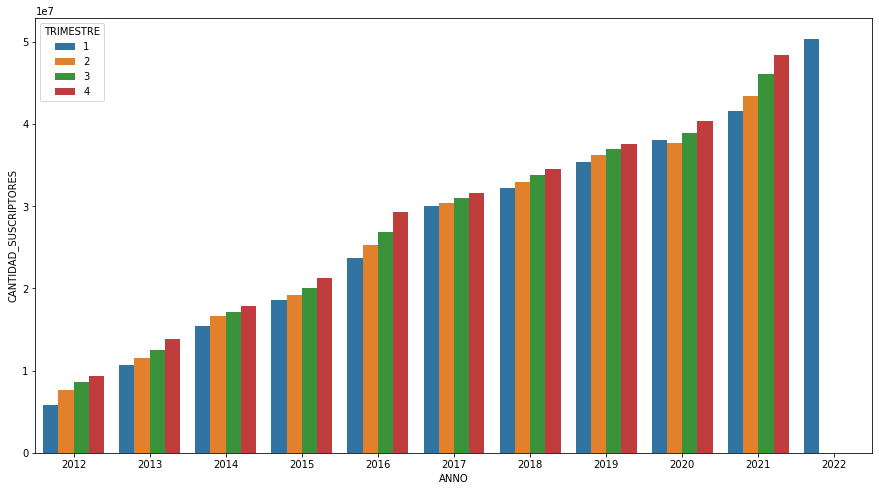

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x="ANNO", y="CANTIDAD_SUSCRIPTORES", data=pd.DataFrame(Abonados_internetCFM.groupby(['ANNO', 'TRIMESTRE']).CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False)).reset_index(level=[0,1]),hue='TRIMESTRE')

Podemos apreciar incremento importante en 2021, el cual coincide con el incremento de los usurios de voz, este se puede ver como consecuencia de la pandemia.

In [ ]:
Abonados_internetCFM.loc[Abonados_internetCFM.TRIMESTRE==1].groupby('ANNO').CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False)

ANNO
2022    50405966
2021    41575545
2020    38084239
2019    35423791
2018    32199638
2017    30066665
2016    23738570
2015    18573254
2014    15421942
2013    10719564
2012     5777484
Name: CANTIDAD_SUSCRIPTORES, dtype: int64

El incremento del 2021 es mas del 20%, el cual es el mayor incremento en los ultimos 5 años

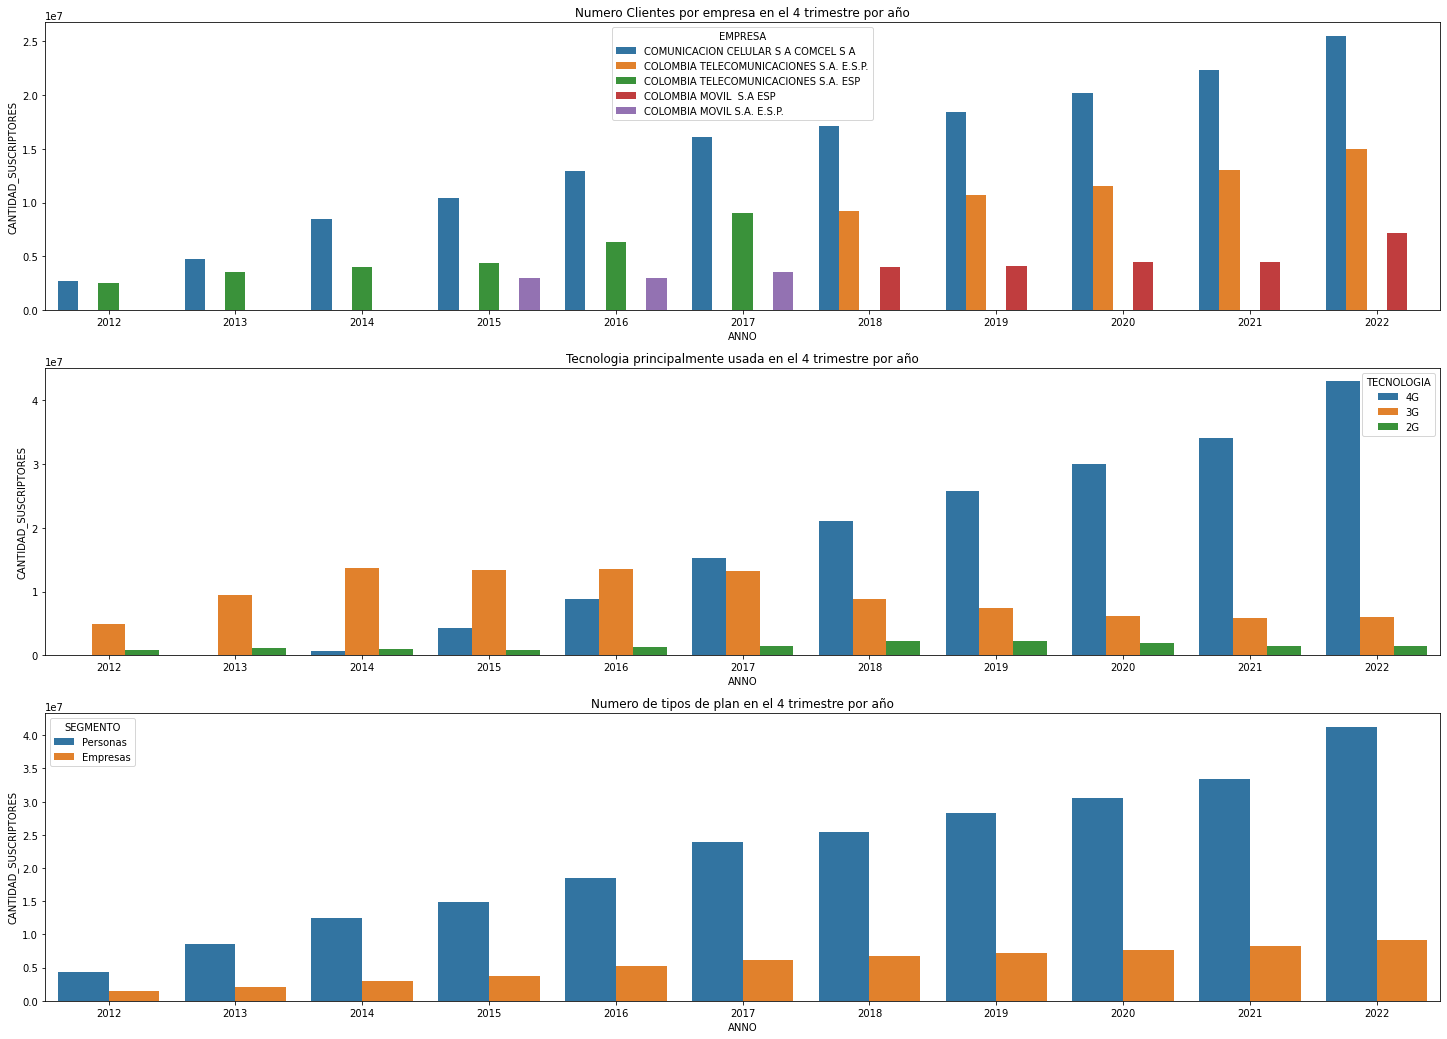

In [ ]:

figure, axes = plt.subplots(3, 1, sharex=False, figsize = (25,18))
axes[0].set_title('Numero Clientes por empresa en el 4 trimestre por año')
axes[1].set_title('Tecnologia principalmente usada en el 4 trimestre por año')
axes[2].set_title('Numero de tipos de plan en el 4 trimestre por año')
sns.barplot(ax=axes[0],x="ANNO", y="CANTIDAD_SUSCRIPTORES", data=pd.DataFrame(Abonados_internetCFM.loc[Abonados_internetCFM.TRIMESTRE==1].groupby(["ANNO","EMPRESA"]).CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(30),hue='EMPRESA')
sns.barplot(ax=axes[1],x="ANNO", y="CANTIDAD_SUSCRIPTORES", data=pd.DataFrame(Abonados_internetCFM.loc[Abonados_internetCFM.TRIMESTRE==1].groupby(["ANNO","TECNOLOGIA"]).CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(36),hue='TECNOLOGIA')
sns.barplot(ax=axes[2],x="ANNO", y="CANTIDAD_SUSCRIPTORES", data=pd.DataFrame(Abonados_internetCFM.loc[Abonados_internetCFM.TRIMESTRE==1].groupby(["ANNO","SEGMENTO"]).CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False)).reset_index(level=[0,1]).head(36),hue='SEGMENTO')

En estas graficas se puede ver como comcel es lider en el mercado, como se dio la transicion de 3G a 4G en 2018 y como incrementa el numero de planes personales mientras los planes de empresa se mantiene casi estaticos


# Preparacion datos

## Servicios Fijos
---
Teniendo en cuenta los objetivos especificos, se crearan 2 nuevos dataframe a partir de los anteriores:


*   El primero tendra la informacion cuanta gente posee el servicio, en total(Lineas, Suscriptores y Accesos) por trimestre de cada respectivo año (2012-1,2021-1)
*   El segundo es lo mismo que el primero, pero agrupados por municipios



In [ ]:
Internet=F3.loc[F3.ANNO>2011].reset_index(drop=True)
Internet['MES']=Internet['TRIMESTRE']*3
Internet[['MES','ANNO']]=Internet[['MES','ANNO']].astype('string')
Internet['FECHA']=Internet['MES'].str.cat(Internet['ANNO'],sep="/")
Internet['FECHA'] = pd.to_datetime(Internet['FECHA'])
Internet.head(5)

,ANNO,TRIMESTRE,ACCESOS,MES,FECHA
0,2017,1,6059231,3,2017-03-01
1,2016,4,5940377,12,2016-12-01
2,2016,3,5895975,9,2016-09-01
3,2016,2,5766971,6,2016-06-01
4,2016,1,5667046,3,2016-03-01


In [ ]:
Telefonia=pd.DataFrame(lineas_telefonial.groupby(['ANNO', 'TRIMESTRE']).LINEAS.sum().sort_values(ascending=False)).reset_index(level=[0,1])
Telefonia['MES']=Telefonia['TRIMESTRE']*3
Telefonia[['MES','ANNO']]=Telefonia[['MES','ANNO']].astype('string')
Telefonia['FECHA']=Telefonia['MES'].str.cat(Telefonia['ANNO'],sep="/")
Telefonia['FECHA'] = pd.to_datetime(Telefonia['FECHA'])
Telefonia.head(5)

,ANNO,TRIMESTRE,LINEAS,MES,FECHA
0,2012,1,8518146,3,2012-03-01
1,2012,4,8362443,12,2012-12-01
2,2012,2,8175881,6,2012-06-01
3,2021,4,7567395,12,2021-12-01
4,2012,3,7465761,9,2012-09-01


In [ ]:
Television=pd.DataFrame(suscriptores_tv.groupby(['ANNO', 'TRIMESTRE']).SUSCRIPTORES.sum().sort_values(ascending=False)).reset_index(level=[0,1])
Television=Television.loc[Television.ANNO>2011].reset_index(drop=True)
Television['MES']=Television['TRIMESTRE']*3
Television[['MES','ANNO']]=Television[['MES','ANNO']].astype('string')
Television['FECHA']=Television['MES'].str.cat(Television['ANNO'],sep="/")
Television['FECHA'] = pd.to_datetime(Television['FECHA'])
Television.head(5)

,ANNO,TRIMESTRE,SUSCRIPTORES,MES,FECHA
0,2022,1,18778408,3,2022-03-01
1,2021,4,18433956,12,2021-12-01
2,2021,3,18271096,9,2021-09-01
3,2020,4,18159832,12,2020-12-01
4,2021,2,18122526,6,2021-06-01


In [ ]:
Total_fijo=pd.merge(Telefonia,pd.merge(Television,Internet))
Total_fijo['TOTAL']=Total_fijo.LINEAS+Total_fijo.SUSCRIPTORES+Total_fijo.ACCESOS
Total_fijo=Total_fijo.reindex(columns=['ANNO',	'TRIMESTRE',	'MES',	'FECHA'	,'LINEAS','SUSCRIPTORES'	,'ACCESOS'	,'TOTAL'])
Total_fijo.sort_values(by='FECHA',inplace=True)
Total_fijo.set_index('FECHA',inplace=True)
Total_fijo

,ANNO,TRIMESTRE,MES,LINEAS,SUSCRIPTORES,ACCESOS,TOTAL
FECHA,,,,,,,
2012-03-01,2012,1,3,8518146,11904638,3481185,23903969
2012-06-01,2012,2,6,8175881,12252061,3567233,23995175
2012-09-01,2012,3,9,7465761,12561329,3746961,23774051
2012-12-01,2012,4,12,8362443,12852696,3898754,25113893
2013-03-01,2013,1,3,7041130,13210283,4114364,24365777
2013-06-01,2013,2,6,6959274,13513989,4296531,24769794
2013-09-01,2013,3,9,7139266,13714040,4411769,25265075
2013-12-01,2013,4,12,7133260,13958676,4497874,25589810
2014-03-01,2014,1,3,7153332,14200242,4689453,26043027


In [ ]:
G1=pd.DataFrame(acceso_internetF1.groupby(['ANNO', 'TRIMESTRE','MUNICIPIO','DEPARTAMENTO']).ACCESOS.sum().sort_values(ascending=False)).reset_index()
G2=pd.DataFrame(acceso_internetF2.groupby(['ANNO', 'TRIMESTRE','MUNICIPIO','DEPARTAMENTO']).ACCESOS.sum().sort_values(ascending=False)).reset_index()
G3=pd.concat([G1,G2])
Internet_MUNICIPIO=G3.loc[G3.ANNO>2011].reset_index(drop=True)
Internet_MUNICIPIO['MES']=Internet_MUNICIPIO['TRIMESTRE']*3
Internet_MUNICIPIO[['MES','ANNO']]=Internet_MUNICIPIO[['MES','ANNO']].astype('string')
Internet_MUNICIPIO['FECHA']=Internet_MUNICIPIO['MES'].str.cat(Internet_MUNICIPIO['ANNO'],sep="/")
Internet_MUNICIPIO['FECHA'] = pd.to_datetime(Internet_MUNICIPIO['FECHA'])
Internet_MUNICIPIO.sort_values(by='ACCESOS',ascending=False)

,ANNO,TRIMESTRE,MUNICIPIO,DEPARTAMENTO,ACCESOS,MES,FECHA
21531,2022,1,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2188444,3,2022-03-01
21532,2021,4,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2169050,12,2021-12-01
21533,2021,2,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2163383,6,2021-06-01
21534,2021,3,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2152403,9,2021-09-01
21535,2021,1,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2137081,3,2021-03-01
...,...,...,...,...,...,...,...
21523,2017,1,COLOMBIA,COLOMBIA,0,3,2017-03-01
21524,2016,4,COLOMBIA,COLOMBIA,0,12,2016-12-01
21529,2016,3,COLOMBIA,COLOMBIA,0,9,2016-09-01
21526,2015,1,COLOMBIA,COLOMBIA,0,3,2015-03-01


In [ ]:
Telefonia_MUNICIPIO=pd.DataFrame(lineas_telefonial.groupby(['ANNO', 'TRIMESTRE','MUNICIPIO','DEPARTAMENTO']).LINEAS.sum().sort_values(ascending=False)).reset_index()
Telefonia_MUNICIPIO['MES']=Telefonia_MUNICIPIO['TRIMESTRE']*3
Telefonia_MUNICIPIO[['MES','ANNO']]=Telefonia_MUNICIPIO[['MES','ANNO']].astype('string')
Telefonia_MUNICIPIO['FECHA']=Telefonia_MUNICIPIO['MES'].str.cat(Telefonia_MUNICIPIO['ANNO'],sep="/")
Telefonia_MUNICIPIO['FECHA'] = pd.to_datetime(Telefonia_MUNICIPIO['FECHA'])
Telefonia_MUNICIPIO.sort_values(by='LINEAS',ascending=False)

,ANNO,TRIMESTRE,MUNICIPIO,DEPARTAMENTO,LINEAS,MES,FECHA
0,2021,4,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2441157,12,2021-12-01
1,2021,2,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2413932,6,2021-06-01
2,2021,3,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2401222,9,2021-09-01
3,2012,1,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",2400116,3,2012-03-01
4,2021,1,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2398201,3,2021-03-01
...,...,...,...,...,...,...,...
36450,2019,2,DIBULLA,LA GUAJIRA,0,6,2019-06-01
36451,2021,3,DIBULLA,LA GUAJIRA,0,9,2021-09-01
36452,2020,2,DIBULLA,LA GUAJIRA,0,6,2020-06-01
36453,2019,3,DIBULLA,LA GUAJIRA,0,9,2019-09-01


In [ ]:
Television_MUNICIPIO=pd.DataFrame(suscriptores_tv.groupby(['ANNO', 'TRIMESTRE','MUNICIPIO','DEPARTAMENTO']).SUSCRIPTORES.sum().sort_values(ascending=False)).reset_index()
Television_MUNICIPIO=Television_MUNICIPIO.loc[Television_MUNICIPIO.ANNO>2011].reset_index(drop=True)
Television_MUNICIPIO['MES']=Television_MUNICIPIO['TRIMESTRE']*3
Television_MUNICIPIO[['MES','ANNO']]=Television_MUNICIPIO[['MES','ANNO']].astype('string')
Television_MUNICIPIO['FECHA']=Television_MUNICIPIO['MES'].str.cat(Television_MUNICIPIO['ANNO'],sep="/")
Television_MUNICIPIO['FECHA'] = pd.to_datetime(Television_MUNICIPIO['FECHA'])
Television_MUNICIPIO.sort_values(by='SUSCRIPTORES',ascending=False)

,ANNO,TRIMESTRE,MUNICIPIO,DEPARTAMENTO,SUSCRIPTORES,MES,FECHA
0,2018,3,"BOGOTÁ, D.C.",BOGOTÁ D.C.,4570752,9,2018-09-01
1,2018,4,"BOGOTÁ, D.C.",BOGOTÁ D.C.,4520091,12,2018-12-01
2,2022,1,"BOGOTÁ, D.C.",BOGOTÁ D.C.,4489848,3,2022-03-01
3,2018,2,"BOGOTÁ, D.C.",BOGOTÁ D.C.,4471561,6,2018-06-01
4,2019,1,"BOGOTÁ, D.C.",BOGOTÁ D.C.,4441538,3,2019-03-01
...,...,...,...,...,...,...,...
41133,2020,3,MORICHAL,GUAINÍA,-3,9,2020-09-01
41134,2020,2,MORICHAL,GUAINÍA,-3,6,2020-06-01
41135,2018,2,MORICHAL,GUAINÍA,-3,6,2018-06-01
41136,2019,1,MORICHAL,GUAINÍA,-3,3,2019-03-01


In [ ]:
Total_fijo_MUNICIPIO=pd.merge(Telefonia_MUNICIPIO,pd.merge(Television_MUNICIPIO,Internet_MUNICIPIO,on=['MUNICIPIO','DEPARTAMENTO','FECHA']),on=['MUNICIPIO','DEPARTAMENTO','FECHA'])
Total_fijo_MUNICIPIO['TOTAL']=Total_fijo_MUNICIPIO.LINEAS+Total_fijo_MUNICIPIO.SUSCRIPTORES+Total_fijo_MUNICIPIO.ACCESOS
Total_fijo_MUNICIPIO=Total_fijo_MUNICIPIO.reindex(columns=['ANNO',	'TRIMESTRE',	'MES',	'FECHA'	,'MUNICIPIO','DEPARTAMENTO','LINEAS','SUSCRIPTORES'	,'ACCESOS'	,'TOTAL'])
Total_fijo_MUNICIPIO.sort_values(by='TOTAL',ascending=False)

,ANNO,TRIMESTRE,MES,FECHA,MUNICIPIO,DEPARTAMENTO,LINEAS,SUSCRIPTORES,ACCESOS,TOTAL
0,2021,4,12,2021-12-01,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2441157,4437031,2169050,9047238
1,2021,2,6,2021-06-01,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2413932,4408084,2163383,8985399
2,2021,3,9,2021-09-01,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2401222,4420995,2152403,8974620
3,2021,1,3,2021-03-01,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2398201,4351714,2137081,8886996
19,2022,1,3,2022-03-01,"BOGOTÁ, D.C.",BOGOTÁ D.C.,2201942,4489848,2188444,8880234
...,...,...,...,...,...,...,...,...,...,...
25093,2017,1,3,2017-03-01,SANTA BÁRBARA,NARIÑO,11,0,2,13
26084,2018,4,12,2018-12-01,NOROSÍ,BOLÍVAR,6,0,6,12
26054,2018,1,3,2018-03-01,NOROSÍ,BOLÍVAR,6,0,5,11
29503,2017,2,6,2017-06-01,LOS ANDES,NARIÑO,1,4,4,9


In [ ]:
print('El total de Suscriptores/Lineas/Accesos sin juntar es: '+ str(Television_MUNICIPIO.SUSCRIPTORES.sum()+Telefonia_MUNICIPIO.LINEAS.sum()+Internet_MUNICIPIO.ACCESOS.sum()))
print('El total de datos Suscriptores/Lineas/Accesos son: '+str(Total_fijo_MUNICIPIO.TOTAL.sum()))
print('Los Suscriptores/Lineas/Accesos que se pierden al junatr son :'+ str(Television_MUNICIPIO.SUSCRIPTORES.sum()+Telefonia_MUNICIPIO.LINEAS.sum()+Internet_MUNICIPIO.ACCESOS.sum()-Total_fijo_MUNICIPIO.TOTAL.sum()))
print('Esto equivale al ' + str((Television_MUNICIPIO.SUSCRIPTORES.sum()+Telefonia_MUNICIPIO.LINEAS.sum()+Internet_MUNICIPIO.ACCESOS.sum()-Total_fijo_MUNICIPIO.TOTAL.sum())/(Television_MUNICIPIO.SUSCRIPTORES.sum()+Telefonia_MUNICIPIO.LINEAS.sum()+Internet_MUNICIPIO.ACCESOS.sum())*100) + '% del total de Suscriptores/Lineas/Accesos')

El total de Suscriptores/Lineas/Accesos sin juntar es: 1147454316
El total de datos Suscriptores/Lineas/Accesos son: 901727084
Los Suscriptores/Lineas/Accesos que se pierden al junatr son :245727232
Esto equivale al 21.414990433484064% del total de Suscriptores/Lineas/Accesos


Esta perdida de casi el 20% del total de clientes totales se debe a error al unir los datos, esto puede ser por que hay municipios sin datos o con diferente nombre entre los datasets

Como queremos ver los municipios con mayor y menor crecimiento se tomo en cuenta el ultimo reporte del año y cambio entre valores

In [ ]:
MUNICIPIOS=Total_fijo_MUNICIPIO.loc[Total_fijo_MUNICIPIO.TRIMESTRE==4]
MUNICIPIOS=MUNICIPIOS.sort_values(by=['MUNICIPIO','DEPARTAMENTO','FECHA'],ascending = [True, True,True])
MUNICIPIOS['%CAMBIO']=MUNICIPIOS.TOTAL.pct_change()
MUNICIPIOS.reset_index(inplace=True,drop=True)

Ahora eliminamos la razon de cambio generada al cambiar de municipio

In [ ]:
for i in range (1,7392):
  if MUNICIPIOS['MUNICIPIO'].iloc[i]!=MUNICIPIOS['MUNICIPIO'].iloc[i-1]:
      MUNICIPIOS.iloc[i,10]=None
MUNICIPIOS

,ANNO,TRIMESTRE,MES,FECHA,MUNICIPIO,DEPARTAMENTO,LINEAS,SUSCRIPTORES,ACCESOS,TOTAL,%CAMBIO
0,2013,4,12,2013-12-01,ABEJORRAL,ANTIOQUIA,1527,547,742,2816,NaN
1,2014,4,12,2014-12-01,ABEJORRAL,ANTIOQUIA,1451,741,813,3005,0.067116
2,2015,4,12,2015-12-01,ABEJORRAL,ANTIOQUIA,1253,2724,875,4852,0.614642
3,2016,4,12,2016-12-01,ABEJORRAL,ANTIOQUIA,1125,3748,890,5763,0.187758
4,2017,4,12,2017-12-01,ABEJORRAL,ANTIOQUIA,1044,3561,962,5567,-0.034010
...,...,...,...,...,...,...,...,...,...,...,...
7387,2014,4,12,2014-12-01,ÚTICA,CUNDINAMARCA,32,715,80,827,0.774678
7388,2015,4,12,2015-12-01,ÚTICA,CUNDINAMARCA,26,810,140,976,0.180169
7389,2016,4,12,2016-12-01,ÚTICA,CUNDINAMARCA,23,1005,159,1187,0.216189
7390,2017,4,12,2017-12-01,ÚTICA,CUNDINAMARCA,21,1128,173,1322,0.113732


## Servicios Moviles
---
Teniendo en cuenta los objetivos especificos, se creara un nuevo dataframe a partir de los anteriores este tendra la informacion de cuanta gente posee el servicio en total(Internet demanda, Internet cargo fijo y telefonia) por trimestre de cada respectivo año (2012-1,2021-1)


In [ ]:
Internet_MOVIL=pd.DataFrame(Abonados_internetM.groupby(['ANNO', 'TRIMESTRE']).CANTIDAD_ABONADOS.sum().sort_values(ascending=False)).reset_index(level=[0,1])
Internet_MOVIL['MES']=Internet_MOVIL['TRIMESTRE']*3
Internet_MOVIL=Internet_MOVIL.loc[Internet_MOVIL.ANNO>2011].reset_index(drop=True)
Internet_MOVIL[['MES','ANNO']]=Internet_MOVIL[['MES','ANNO']].astype('string')
Internet_MOVIL['FECHA']=Internet_MOVIL['MES'].str.cat(Internet_MOVIL['ANNO'],sep="/")
Internet_MOVIL.head(5)

,ANNO,TRIMESTRE,CANTIDAD_ABONADOS,MES,FECHA
0,2021,4,62131401,12,12/2021
1,2022,1,61821077,3,3/2022
2,2021,3,60324032,9,9/2021
3,2021,2,56437203,6,6/2021
4,2021,1,55128412,3,3/2021


In [ ]:
Internet_MOVIL_CF=pd.DataFrame(Abonados_internetCFM.groupby(['ANNO', 'TRIMESTRE']).CANTIDAD_SUSCRIPTORES.sum().sort_values(ascending=False)).reset_index(level=[0,1])
Internet_MOVIL_CF['MES']=Internet_MOVIL_CF['TRIMESTRE']*3
Internet_MOVIL_CF=Internet_MOVIL_CF.loc[Internet_MOVIL_CF.ANNO>2011].reset_index(drop=True)
Internet_MOVIL_CF[['MES','ANNO']]=Internet_MOVIL_CF[['MES','ANNO']].astype('string')
Internet_MOVIL_CF['FECHA']=Internet_MOVIL_CF['MES'].str.cat(Internet_MOVIL_CF['ANNO'],sep="/")
Internet_MOVIL_CF.head(5)

,ANNO,TRIMESTRE,CANTIDAD_SUSCRIPTORES,MES,FECHA
0,2022,1,50405966,3,3/2022
1,2021,4,48471961,12,12/2021
2,2021,3,46112765,9,9/2021
3,2021,2,43421803,6,6/2021
4,2021,1,41575545,3,3/2021


In [ ]:
VOZ=pd.DataFrame(Abonados_vozM.groupby(['ANNO', 'TRIMESTRE'])[" ABONADOS "].sum().sort_values(ascending=False)).reset_index(level=[0,1])
VOZ.rename(columns={' ABONADOS ':'ABONADOS'},inplace=True)
VOZ['MES']=VOZ['TRIMESTRE']*3
VOZ=VOZ.loc[VOZ.ANNO>2011].reset_index(drop=True)
VOZ[['MES','ANNO']]=VOZ[['MES','ANNO']].astype('string')
VOZ['FECHA']=VOZ['MES'].str.cat(VOZ['ANNO'],sep="/")
VOZ.head(5)

,ANNO,TRIMESTRE,ABONADOS,MES,FECHA
0,2022,1,75991858,3,3/2022
1,2021,4,75056111,12,12/2021
2,2021,3,73048313,9,9/2021
3,2021,2,70491511,6,6/2021
4,2021,1,69442353,3,3/2021


In [ ]:
Total_movil=pd.merge(VOZ,pd.merge(Internet_MOVIL,Internet_MOVIL_CF))
Total_movil['TOTAL']=Total_movil.CANTIDAD_ABONADOS+Total_movil.ABONADOS+Total_movil.CANTIDAD_SUSCRIPTORES
Total_movil=Total_movil.reindex(columns=['ANNO',	'TRIMESTRE',	'MES',	'FECHA'	,'ABONADOS','CANTIDAD_SUSCRIPTORES'	,'CANTIDAD_ABONADOS'	,'TOTAL'])
Total_movil.head(5)

,ANNO,TRIMESTRE,MES,FECHA,ABONADOS,CANTIDAD_SUSCRIPTORES,CANTIDAD_ABONADOS,TOTAL
0,2022,1,3,3/2022,75991858,50405966,61821077,188218901
1,2021,4,12,12/2021,75056111,48471961,62131401,185659473
2,2021,3,9,9/2021,73048313,46112765,60324032,179485110
3,2021,2,6,6/2021,70491511,43421803,56437203,170350517
4,2021,1,3,3/2021,69442353,41575545,55128412,166146310


#Modelos
---
Para cumplir con los objetivos se realizaran 2 modelos, 